# Import libraries

In [ ]:
#plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ML
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split


#DL
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l2

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Multiply, LayerNormalization,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError


#statistical test
from scipy.stats import wilcoxon
import scipy.stats as stats
from scipy.stats import ttest_rel
from scipy.stats import shapiro


#other
from joblib import dump, load
import shap
import pandas as pd
import os
import random


# Hide Warnings
import warnings

warnings.filterwarnings("ignore")

from IPython.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:95% !important; }</style>"))

In [2]:
# Suppress TensorFlow CUDA warnings (optional)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Reduces verbosity

SEED = 0

def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    # Enable deterministic GPU operations (may affect performance)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

set_seeds(SEED)

In [3]:
df_complete = pd.read_feather("/path/to/complete_data.feather")
df_complete["date"] = pd.to_datetime(df_complete["date"], format="%Y-%m-%d")
df_complete.reset_index(drop=True, inplace=True)
df_complete.set_index("date", inplace=True, drop=True)
df_complete

arpa_CO    s5p_CO       cams_CO   r  r_pre            tp  \
date                                                                    
2019-01-01  0.618750  0.035791  4.095564e-07 NaN    NaN           NaN   
2019-01-01  1.812500  0.034532  3.810000e-07 NaN    NaN           NaN   
2019-01-01  1.400000  0.034532  3.717811e-07 NaN    NaN           NaN   
2019-01-01  0.825000  0.035447  3.616589e-07 NaN    NaN           NaN   
2019-01-01  1.243750  0.036033  3.614726e-07 NaN    NaN           NaN   
...              ...       ...           ...  ..    ...           ...   
2024-12-31  1.373684  0.038286           NaN NaN    NaN  1.808715e-07   
2024-12-31  1.647368  0.038143           NaN NaN    NaN  1.049269e-07   
2024-12-31  2.026316  0.037352           NaN NaN    NaN  9.712973e-08   
2024-12-31  1.210526  0.038795           NaN NaN    NaN  8.457011e-08   
2024-12-31  1.305263  0.035330           NaN NaN    NaN  6.193031e-08   

                      ssr            str         t2m             sp  ...  \
date                                                                 ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
...                   ...            ...         ...            ...  ...   
2024-12-31  257601.098259 -224314.557407  276.479340  101519.943595  ...   
2024-12-31  260016.302506 -227914.900344  276.385801  101132.118861  ...   
2024-12-31  261847.113250 -231467.654353  276.434759  100798.676379  ...   
2024-12-31  263957.553439 -236423.314723  276.495581  100408.586948  ...   
2024-12-31  267367.433703 -233327.094201  276.464741  100192.972787  ...   

            tp_pre       ssr_pre        str_pre     t2m_pre         sp_pre  \
date                                                                         
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
...            ...           ...            ...         ...            ...   
2024-12-31     0.0  13306.114614 -215544.141199  276.518430  101354.229813   
2024-12-31     0.0  13388.970664 -219750.408036  276.731064  100971.043009   
2024-12-31     0.0  13364.250011 -222639.835045  276.858498  100641.185382   
2024-12-31     0.0  13221.958211 -226415.906540  276.879020  100255.445716   
2024-12-31     0.0  14484.505586 -227976.520489  278.886548  100040.622860   

              blh_pre  wind_speed_pre  wind_dir_pre  lai_hv_pre  lai_lv_pre  
date                                                                         
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
...               ...             ...           ...         ...         ...  
2024-12-31  21.353957        1.115551    283.396891    1.922135    1.638666  
2024-12-31  20.802328        1.136056    280.839577    1.963621    1.607436  
2024-12-31  20.326394        1.105231    267.814780    1.960006    1.625828  
2024-12-31  19.934606        1.080557    248.364002    1.938664    1.669247  
2024-12-31  16.613612        1.101296    167.674075    2.038646    1.564334  

[10608 rows x 25 columns]

In [4]:
df_complete.dtypes

arpa_CO           float64
s5p_CO            float64
cams_CO           float64
r                 float64
r_pre             float64
tp                float64
ssr               float64
str               float64
t2m               float64
sp                float64
blh               float64
wind_speed        float64
wind_dir          float64
lai_hv            float64
lai_lv            float64
tp_pre            float64
ssr_pre           float64
str_pre           float64
t2m_pre           float64
sp_pre            float64
blh_pre           float64
wind_speed_pre    float64
wind_dir_pre      float64
lai_hv_pre        float64
lai_lv_pre        float64
dtype: object

In [5]:

#if use time window 15:00-15:00, uncomment this block
'''
df_complete['r_pre'] = df_complete['r'].shift(1)
df_complete['lai_hv_pre'] = df_complete['lai_hv'].shift(1)
df_complete['lai_lv_pre'] = df_complete['lai_lv'].shift(1)
df_complete['tp_pre'] = df_complete['tp'].shift(1)
df_complete['ssr_pre'] = df_complete['ssr'].shift(1)
df_complete['str_pre'] = df_complete['str'].shift(1)
df_complete['t2m_pre'] = df_complete['t2m'].shift(1)

df_complete['sp_pre'] = df_complete['sp'].shift(1)

df_complete['blh_pre'] = df_complete['blh'].shift(1)

df_complete['wind_speed_pre'] = df_complete['wind_speed'].shift(1)

df_complete['prev_wind_dir'] = df_complete['curr_wind_dir'].shift(1)
'''

"\ndf_complete['r_pre'] = df_complete['r'].shift(1)\ndf_complete['lai_hv_pre'] = df_complete['lai_hv'].shift(1)\ndf_complete['lai_lv_pre'] = df_complete['lai_lv'].shift(1)\ndf_complete['tp_pre'] = df_complete['tp'].shift(1)\ndf_complete['ssr_pre'] = df_complete['ssr'].shift(1)\ndf_complete['str_pre'] = df_complete['str'].shift(1)\ndf_complete['t2m_pre'] = df_complete['t2m'].shift(1)\n\ndf_complete['sp_pre'] = df_complete['sp'].shift(1)\n\ndf_complete['blh_pre'] = df_complete['blh'].shift(1)\n\ndf_complete['wind_speed_pre'] = df_complete['wind_speed'].shift(1)\n\ndf_complete['prev_wind_dir'] = df_complete['curr_wind_dir'].shift(1)\n"

In [6]:
df_complete

arpa_CO    s5p_CO       cams_CO   r  r_pre            tp  \
date                                                                    
2019-01-01  0.618750  0.035791  4.095564e-07 NaN    NaN           NaN   
2019-01-01  1.812500  0.034532  3.810000e-07 NaN    NaN           NaN   
2019-01-01  1.400000  0.034532  3.717811e-07 NaN    NaN           NaN   
2019-01-01  0.825000  0.035447  3.616589e-07 NaN    NaN           NaN   
2019-01-01  1.243750  0.036033  3.614726e-07 NaN    NaN           NaN   
...              ...       ...           ...  ..    ...           ...   
2024-12-31  1.373684  0.038286           NaN NaN    NaN  1.808715e-07   
2024-12-31  1.647368  0.038143           NaN NaN    NaN  1.049269e-07   
2024-12-31  2.026316  0.037352           NaN NaN    NaN  9.712973e-08   
2024-12-31  1.210526  0.038795           NaN NaN    NaN  8.457011e-08   
2024-12-31  1.305263  0.035330           NaN NaN    NaN  6.193031e-08   

                      ssr            str         t2m             sp  ...  \
date                                                                 ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
...                   ...            ...         ...            ...  ...   
2024-12-31  257601.098259 -224314.557407  276.479340  101519.943595  ...   
2024-12-31  260016.302506 -227914.900344  276.385801  101132.118861  ...   
2024-12-31  261847.113250 -231467.654353  276.434759  100798.676379  ...   
2024-12-31  263957.553439 -236423.314723  276.495581  100408.586948  ...   
2024-12-31  267367.433703 -233327.094201  276.464741  100192.972787  ...   

            tp_pre       ssr_pre        str_pre     t2m_pre         sp_pre  \
date                                                                         
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
...            ...           ...            ...         ...            ...   
2024-12-31     0.0  13306.114614 -215544.141199  276.518430  101354.229813   
2024-12-31     0.0  13388.970664 -219750.408036  276.731064  100971.043009   
2024-12-31     0.0  13364.250011 -222639.835045  276.858498  100641.185382   
2024-12-31     0.0  13221.958211 -226415.906540  276.879020  100255.445716   
2024-12-31     0.0  14484.505586 -227976.520489  278.886548  100040.622860   

              blh_pre  wind_speed_pre  wind_dir_pre  lai_hv_pre  lai_lv_pre  
date                                                                         
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
...               ...             ...           ...         ...         ...  
2024-12-31  21.353957        1.115551    283.396891    1.922135    1.638666  
2024-12-31  20.802328        1.136056    280.839577    1.963621    1.607436  
2024-12-31  20.326394        1.105231    267.814780    1.960006    1.625828  
2024-12-31  19.934606        1.080557    248.364002    1.938664    1.669247  
2024-12-31  16.613612        1.101296    167.674075    2.038646    1.564334  

[10608 rows x 25 columns]

# Feature engineering

## Wind Direction Average

In [7]:
# Group by date and compute vector-averaged wind directions
def vector_average_angle(angles_deg):
    angles_rad = np.deg2rad(angles_deg)
    sin_avg = np.mean(np.sin(angles_rad))
    cos_avg = np.mean(np.cos(angles_rad))
    angle_rad_avg = np.arctan2(sin_avg, cos_avg)
    angle_deg_avg = (np.rad2deg(angle_rad_avg) + 360) % 360
    return angle_deg_avg

df_complete_wind_dir = df_complete.groupby("date").agg(
    wind_dir=pd.NamedAgg(column="wind_dir", aggfunc=vector_average_angle),
    wind_dir_pre=pd.NamedAgg(column="wind_dir_pre", aggfunc=vector_average_angle)
).reset_index()

In [8]:
df_complete_wind_dir

date    wind_dir  wind_dir_pre
0    2019-01-01         NaN           NaN
1    2019-01-02         NaN           NaN
2    2019-01-03  289.699303    137.417828
3    2019-01-04  204.734891    259.681814
4    2019-01-05  258.634541    263.237834
...         ...         ...           ...
2187 2024-12-27  261.868878    246.178078
2188 2024-12-28  246.633360    264.293779
2189 2024-12-29  233.218724    239.620729
2190 2024-12-30  230.717246    269.375521
2191 2024-12-31  236.721195    255.283206

[2192 rows x 3 columns]

# wind Cyclical Encoding

In [9]:
def add_cyclical_features(df, column, max_value=360):
    df[f"{column}_sin"] = np.sin(2 * np.pi * df[column] / max_value)
    df[f"{column}_cos"] = np.cos(2 * np.pi * df[column] / max_value)
    return df

df_complete_wind_dir = add_cyclical_features(df_complete_wind_dir, "wind_dir")
df_complete_wind_dir = add_cyclical_features(df_complete_wind_dir, "wind_dir_pre")
#drop the original angle columns
df_complete_wind_dir = df_complete_wind_dir.drop(columns=["wind_dir", "wind_dir_pre"])
df_complete_wind_dir

date  wind_dir_sin  wind_dir_cos  wind_dir_pre_sin  \
0    2019-01-01           NaN           NaN               NaN   
1    2019-01-02           NaN           NaN               NaN   
2    2019-01-03     -0.941475      0.337084          0.676647   
3    2019-01-04     -0.418420     -0.908254         -0.983828   
4    2019-01-05     -0.980390     -0.197066         -0.993043   
...         ...           ...           ...               ...   
2187 2024-12-27     -0.989947     -0.141439         -0.914805   
2188 2024-12-28     -0.917986     -0.396613         -0.995045   
2189 2024-12-29     -0.800927     -0.598762         -0.862697   
2190 2024-12-30     -0.774031     -0.633148         -0.999941   
2191 2024-12-31     -0.836010     -0.548714         -0.967193   

      wind_dir_pre_cos  
0                  NaN  
1                  NaN  
2            -0.736308  
3            -0.179114  
4            -0.117748  
...                ...  
2187         -0.403895  
2188         -0.099428  
2189         -0.505722  
2190         -0.010899  
2191         -0.254041  

[2192 rows x 5 columns]

## Average by date

In [10]:
df_complete

arpa_CO    s5p_CO       cams_CO   r  r_pre            tp  \
date                                                                    
2019-01-01  0.618750  0.035791  4.095564e-07 NaN    NaN           NaN   
2019-01-01  1.812500  0.034532  3.810000e-07 NaN    NaN           NaN   
2019-01-01  1.400000  0.034532  3.717811e-07 NaN    NaN           NaN   
2019-01-01  0.825000  0.035447  3.616589e-07 NaN    NaN           NaN   
2019-01-01  1.243750  0.036033  3.614726e-07 NaN    NaN           NaN   
...              ...       ...           ...  ..    ...           ...   
2024-12-31  1.373684  0.038286           NaN NaN    NaN  1.808715e-07   
2024-12-31  1.647368  0.038143           NaN NaN    NaN  1.049269e-07   
2024-12-31  2.026316  0.037352           NaN NaN    NaN  9.712973e-08   
2024-12-31  1.210526  0.038795           NaN NaN    NaN  8.457011e-08   
2024-12-31  1.305263  0.035330           NaN NaN    NaN  6.193031e-08   

                      ssr            str         t2m             sp  ...  \
date                                                                 ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
2019-01-01            NaN            NaN         NaN            NaN  ...   
...                   ...            ...         ...            ...  ...   
2024-12-31  257601.098259 -224314.557407  276.479340  101519.943595  ...   
2024-12-31  260016.302506 -227914.900344  276.385801  101132.118861  ...   
2024-12-31  261847.113250 -231467.654353  276.434759  100798.676379  ...   
2024-12-31  263957.553439 -236423.314723  276.495581  100408.586948  ...   
2024-12-31  267367.433703 -233327.094201  276.464741  100192.972787  ...   

            tp_pre       ssr_pre        str_pre     t2m_pre         sp_pre  \
date                                                                         
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
2019-01-01     NaN           NaN            NaN         NaN            NaN   
...            ...           ...            ...         ...            ...   
2024-12-31     0.0  13306.114614 -215544.141199  276.518430  101354.229813   
2024-12-31     0.0  13388.970664 -219750.408036  276.731064  100971.043009   
2024-12-31     0.0  13364.250011 -222639.835045  276.858498  100641.185382   
2024-12-31     0.0  13221.958211 -226415.906540  276.879020  100255.445716   
2024-12-31     0.0  14484.505586 -227976.520489  278.886548  100040.622860   

              blh_pre  wind_speed_pre  wind_dir_pre  lai_hv_pre  lai_lv_pre  
date                                                                         
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
2019-01-01        NaN             NaN           NaN         NaN         NaN  
...               ...             ...           ...         ...         ...  
2024-12-31  21.353957        1.115551    283.396891    1.922135    1.638666  
2024-12-31  20.802328        1.136056    280.839577    1.963621    1.607436  
2024-12-31  20.326394        1.105231    267.814780    1.960006    1.625828  
2024-12-31  19.934606        1.080557    248.364002    1.938664    1.669247  
2024-12-31  16.613612        1.101296    167.674075    2.038646    1.564334  

[10608 rows x 25 columns]

In [11]:
df_complete=df_complete.drop(
    columns=["wind_dir", "wind_dir_pre"])
df_complete = df_complete.groupby("date").mean()
df_complete

arpa_CO    s5p_CO       cams_CO          r      r_pre  \
date                                                                 
2019-01-01  1.180000  0.035267  3.770938e-07        NaN        NaN   
2019-01-02  0.891579  0.032974  2.824356e-07        NaN        NaN   
2019-01-03  0.606316  0.036171  1.889109e-07  46.641597  37.779809   
2019-01-04  1.064211       NaN  3.196309e-07  51.410032  43.903486   
2019-01-05  1.576842  0.037833  3.064936e-07  59.479203  53.215448   
...              ...       ...           ...        ...        ...   
2024-12-27  1.031579  0.034768           NaN        NaN        NaN   
2024-12-28  1.041053  0.033513           NaN        NaN        NaN   
2024-12-29  1.366316  0.035366           NaN        NaN        NaN   
2024-12-30  1.497895  0.035262           NaN        NaN        NaN   
2024-12-31  1.512632  0.037581           NaN        NaN        NaN   

                      tp            ssr            str         t2m  \
date                                                                 
2019-01-01           NaN            NaN            NaN         NaN   
2019-01-02           NaN            NaN            NaN         NaN   
2019-01-03  4.738731e-09  298597.147719 -371299.779479  277.819891   
2019-01-04  4.231597e-07  295073.856831 -307369.054841  273.828648   
2019-01-05  1.964209e-07  272394.035475 -261829.277860  274.369225   
...                  ...            ...            ...         ...   
2024-12-27  9.524280e-10  284643.225136 -278471.518188  275.053108   
2024-12-28  9.524280e-10  282490.875944 -256997.660214  276.680927   
2024-12-29  0.000000e+00  286180.455282 -265531.984307  277.360834   
2024-12-30  0.000000e+00  281306.736278 -265076.399126  277.422235   
2024-12-31  1.058857e-07  262157.900232 -230689.504206  276.452045   

                       sp  ...    lai_lv        tp_pre       ssr_pre  \
date                       ...                                         
2019-01-01            NaN  ...       NaN           NaN           NaN   
2019-01-02            NaN  ...       NaN           NaN           NaN   
2019-01-03  100262.874109  ...  1.618758  2.369910e-07  16398.122648   
2019-01-04  100522.088216  ...  1.618092  0.000000e+00  16676.530737   
2019-01-05   99999.784231  ...  1.617425  0.000000e+00  16718.959529   
...                   ...  ...       ...           ...           ...   
2024-12-27  101081.016524  ...  1.623439  0.000000e+00  11681.295304   
2024-12-28  100637.889865  ...  1.622770  0.000000e+00  11980.756092   
2024-12-29  100465.890162  ...  1.622101  0.000000e+00  12186.128974   
2024-12-30  100612.083909  ...  1.621437  0.000000e+00  12984.691700   
2024-12-31  100810.459714  ...  1.620760  0.000000e+00  13553.159817   

                  str_pre     t2m_pre         sp_pre      blh_pre  \
date                                                                
2019-01-01            NaN         NaN            NaN          NaN   
2019-01-02            NaN         NaN            NaN          NaN   
2019-01-03 -378144.578206  280.460087  100143.018120  1122.116296   
2019-01-04 -306054.917471  274.996017  100344.389126   134.655960   
2019-01-05 -218960.789968  274.672809  100480.141480    19.249516   
...                   ...         ...            ...          ...   
2024-12-27 -268613.976806  275.409244  101043.542665    26.209431   
2024-12-28 -252283.423520  275.556256  100843.841802    29.807412   
2024-12-29 -228643.041695  277.948905  100428.646260    19.577048   
2024-12-30 -238004.614566  278.436503  100461.274151    19.910454   
2024-12-31 -222465.362262  277.174712  100652.505356    19.806179   

            wind_speed_pre  lai_hv_pre  lai_lv_pre  
date                                                
2019-01-01             NaN         NaN         NaN  
2019-01-02             NaN         NaN         NaN  
2019-01-03        5.528460    1.963685    1.619105  
2019-01-04        1.620950    1.963370    1.618413  
2019-01-05        0.790367    1.963062

# Merge wind

In [12]:
df_complete = df_complete.merge(df_complete_wind_dir, on="date")
df_complete.set_index("date", drop=True, inplace=True)
df_complete

arpa_CO    s5p_CO       cams_CO          r      r_pre  \
date                                                                 
2019-01-01  1.180000  0.035267  3.770938e-07        NaN        NaN   
2019-01-02  0.891579  0.032974  2.824356e-07        NaN        NaN   
2019-01-03  0.606316  0.036171  1.889109e-07  46.641597  37.779809   
2019-01-04  1.064211       NaN  3.196309e-07  51.410032  43.903486   
2019-01-05  1.576842  0.037833  3.064936e-07  59.479203  53.215448   
...              ...       ...           ...        ...        ...   
2024-12-27  1.031579  0.034768           NaN        NaN        NaN   
2024-12-28  1.041053  0.033513           NaN        NaN        NaN   
2024-12-29  1.366316  0.035366           NaN        NaN        NaN   
2024-12-30  1.497895  0.035262           NaN        NaN        NaN   
2024-12-31  1.512632  0.037581           NaN        NaN        NaN   

                      tp            ssr            str         t2m  \
date                                                                 
2019-01-01           NaN            NaN            NaN         NaN   
2019-01-02           NaN            NaN            NaN         NaN   
2019-01-03  4.738731e-09  298597.147719 -371299.779479  277.819891   
2019-01-04  4.231597e-07  295073.856831 -307369.054841  273.828648   
2019-01-05  1.964209e-07  272394.035475 -261829.277860  274.369225   
...                  ...            ...            ...         ...   
2024-12-27  9.524280e-10  284643.225136 -278471.518188  275.053108   
2024-12-28  9.524280e-10  282490.875944 -256997.660214  276.680927   
2024-12-29  0.000000e+00  286180.455282 -265531.984307  277.360834   
2024-12-30  0.000000e+00  281306.736278 -265076.399126  277.422235   
2024-12-31  1.058857e-07  262157.900232 -230689.504206  276.452045   

                       sp  ...     t2m_pre         sp_pre      blh_pre  \
date                       ...                                           
2019-01-01            NaN  ...         NaN            NaN          NaN   
2019-01-02            NaN  ...         NaN            NaN          NaN   
2019-01-03  100262.874109  ...  280.460087  100143.018120  1122.116296   
2019-01-04  100522.088216  ...  274.996017  100344.389126   134.655960   
2019-01-05   99999.784231  ...  274.672809  100480.141480    19.249516   
...                   ...  ...         ...            ...          ...   
2024-12-27  101081.016524  ...  275.409244  101043.542665    26.209431   
2024-12-28  100637.889865  ...  275.556256  100843.841802    29.807412   
2024-12-29  100465.890162  ...  277.948905  100428.646260    19.577048   
2024-12-30  100612.083909  ...  278.436503  100461.274151    19.910454   
2024-12-31  100810.459714  ...  277.174712  100652.505356    19.806179   

            wind_speed_pre  lai_hv_pre  lai_lv_pre  wind_dir_sin  \
date                                                               
2019-01-01             NaN         NaN         NaN           NaN   
2019-01-02             NaN         NaN         NaN           NaN   
2019-01-03        5.528460    1.963685    1.619105     -0.941475   
2019-01-04        1.620950    1.963370    1.618413     -0.418420   
2019-01-05        0.790367    1.963062    1.617762     -0.980390   
...                    ...         ...         ...           ...   
2024-12-27        1.631343    1.965906    1.623777     -0.989947   
2024-12-28        1.368907    1.965581    1.623096     -0.917986   
2024-12-29        1.126425    1.965265    1.622443     -0.800927   
2024-12-30        1.274953    1.964940    1.621778     -0.774031   
2024-12-31        1.107738    1.964614    1.621102     -0.836010   

            wind_dir_cos  wind_dir_pre_sin  wind_dir_pre_cos  
date                                                          
2019-01-01           NaN               NaN               NaN  
2019-01-02           NaN               NaN               NaN  
2019-01-03      0.337084          0.676647         -0.736308  
2019-01-04     -0.908254    

In [13]:
# Solar-Thermal Contrast
df_complete["solar_thermal_contrast"] = (df_complete["ssr"] - df_complete["str"]) / (df_complete["ssr"] + df_complete["str"])

In [14]:
#normalized_CO = s5p_CO / blh
df_complete["CO_per_blh"] = df_complete["s5p_CO"] / df_complete["blh"]

In [15]:
# Drop rows with NaN 
df_complete = df_complete.dropna()

In [16]:
df_complete

arpa_CO    s5p_CO       cams_CO          r      r_pre  \
date                                                                 
2019-01-03  0.606316  0.036171  1.889109e-07  46.641597  37.779809   
2019-01-05  1.576842  0.037833  3.064936e-07  59.479203  53.215448   
2019-01-06  1.402105  0.035538  2.860080e-07  58.450944  60.573325   
2019-01-07  1.468421  0.039746  2.828122e-07  55.165493  52.032681   
2019-01-09  1.129474  0.033214  2.957438e-07  69.126679  72.761415   
...              ...       ...           ...        ...        ...   
2024-11-26  0.820000  0.034916  2.476492e-07  85.774530  85.915377   
2024-11-27  0.837895  0.032648  2.918627e-07  87.993952  84.722713   
2024-11-28  0.828421  0.033417  2.759996e-07  92.100006  83.978641   
2024-11-29  0.762749  0.035089  2.725054e-07  85.204204  81.310544   
2024-11-30  0.960000  0.036455  2.460414e-07  85.549617  73.463893   

                      tp            ssr            str         t2m  \
date                                                                 
2019-01-03  4.738731e-09  298597.147719 -371299.779479  277.819891   
2019-01-05  1.964209e-07  272394.035475 -261829.277860  274.369225   
2019-01-06  1.658556e-08  304366.605549 -302604.884703  279.191344   
2019-01-07  0.000000e+00  300842.199608 -309747.287126  278.250179   
2019-01-09  6.130445e-07  281774.024489 -306795.023985  276.935752   
...                  ...            ...            ...         ...   
2024-11-26  2.501625e-04  140350.953374  -59011.873668  281.742355   
2024-11-27  1.431004e-05  171169.725732  -92458.869431  282.147933   
2024-11-28  2.415389e-06  189747.919439  -99616.343867  281.623480   
2024-11-29  6.526176e-06  163109.900756 -147433.961317  280.315911   
2024-11-30  6.214505e-06  220478.532791 -144818.118833  279.891672   

                       sp  ...      blh_pre  wind_speed_pre  lai_hv_pre  \
date                       ...                                            
2019-01-03  100262.874109  ...  1122.116296        5.528460    1.963685   
2019-01-05   99999.784231  ...    19.249516        0.790367    1.963062   
2019-01-06   99666.374389  ...   105.204894        2.905333    1.962768   
2019-01-07  100141.215810  ...   264.564240        3.930619    1.962438   
2019-01-09   98574.571534  ...    48.843135        1.950357    1.961802   
...                   ...  ...          ...             ...         ...   
2024-11-26   99978.122368  ...    54.885669        0.682863    1.995360   
2024-11-27  100065.732253  ...    43.640718        0.852439    1.994008   
2024-11-28  100063.706832  ...    25.469618        0.945131    1.992677   
2024-11-29  100169.267948  ...    53.021948        1.425776    1.991339   
2024-11-30  100647.786650  ...    30.001580        1.492675    1.990024   

            lai_lv_pre  wind_dir_sin  wind_dir_cos  wind_dir_pre_sin  \
date                                                                   
2019-01-03    1.619105     -0.941475      0.337084          0.676647   
2019-01-05    1.617762     -0.980390     -0.197066         -0.993043   
2019-01-06    1.617083     -0.764365      0.644784         -0.897872   
2019-01-07    1.616421     -0.484231     -0.874940         -0.507895   
2019-01-09    1.615092     -0.910653      0.413172         -0.861429   
...                ...           ...           ...               ...   
2024-11-26    1.687291     -0.416424     -0.909170         -0.673899   
2024-11-27    1.684388     -0.860747     -0.509033          0.963696   
2024-11-28    1.681518     -0.978663     -0.205471         -0.939450   
2024-11-29    1.678591      0.834508     -0.550996         -0.975961   
2024-11-30    1.675728      0.749681      0.661800          0.684936   

            wind_dir_pre_cos  solar_thermal_contrast  CO_per_blh  
date                                                              
2019-01-03         -0.736308               -9.214205    0.000070  
2019-01-05         -0.117748               50.566547    0.000385  
2019-01-06

# GEDA

In [17]:
# Graph ground CO complete timeseries
fig = go.Figure()
fig.add_trace(
    go.Scatter(y=df_complete["arpa_CO"], x=df_complete.index, name="arpa_CO")
)
fig.update_xaxes(
    title_text="Date",
    showgrid=True,
    gridwidth=1,
    gridcolor="LightGray",
    mirror=True,
    ticks="outside",
    showline=True,
    linecolor="gray",
)
fig.update_yaxes(
    title_text="CO<sub></sub> [mg/m<sup>3</sup>]",
    showgrid=True,
    gridwidth=1,
    gridcolor="LightGray",
    mirror=True,
    ticks="outside",
    showline=True,
    linecolor="gray",
)
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
fig.show()

# Divide in Train/val/Test

# shuffle split

In [18]:
#shuffle all data
train_val,test = train_test_split(
    df_complete, test_size=0.2, random_state=0, shuffle=True
)

train, val = train_test_split(
    train_val, test_size=0.25, random_state=0, shuffle=True
)


In [19]:
train.index

DatetimeIndex(['2023-07-17', '2023-11-09', '2023-03-28', '2022-09-13',
               '2021-12-05', '2024-07-31', '2022-12-05', '2023-03-12',
               '2019-09-02', '2021-12-13',
               ...
               '2019-07-10', '2021-04-23', '2024-06-05', '2022-03-11',
               '2021-03-07', '2024-04-01', '2024-07-23', '2022-08-25',
               '2019-04-06', '2024-05-11'],
              dtype='datetime64[ns]', name='date', length=1017, freq=None)

In [20]:
val.index

DatetimeIndex(['2021-04-18', '2024-08-17', '2023-01-17', '2023-05-07',
               '2021-05-24', '2021-10-10', '2024-04-03', '2023-09-06',
               '2019-01-21', '2024-09-14',
               ...
               '2023-11-06', '2024-11-27', '2021-10-06', '2020-03-23',
               '2023-10-18', '2019-06-02', '2020-04-07', '2020-02-28',
               '2024-07-19', '2020-09-15'],
              dtype='datetime64[ns]', name='date', length=339, freq=None)

In [21]:
test.index

DatetimeIndex(['2022-07-13', '2019-01-11', '2019-05-29', '2019-02-20',
               '2024-11-17', '2019-11-21', '2021-09-11', '2020-11-03',
               '2022-06-11', '2019-07-28',
               ...
               '2019-07-07', '2024-08-19', '2021-03-13', '2022-01-26',
               '2020-04-05', '2020-02-18', '2021-01-22', '2019-08-06',
               '2024-09-06', '2022-07-09'],
              dtype='datetime64[ns]', name='date', length=340, freq=None)

In [22]:
print(f"Train: {len(train)/len(df_complete):.2%}")
print(f"val: {len(val)/len(df_complete):.2%}")
print(f"Test: {len(test)/len(df_complete):.2%}")

Train: 59.96%
val: 19.99%
Test: 20.05%


In [23]:

#if want to test chronological split, you can take the refrence of the following code
#chronological split
'''
# Sort dates chronologically
dates = sorted(df_complete.index.unique())

# Split into train (60%), val (20%), test (20%)
train_size = int(0.6 * len(dates))
val_size = int(0.2 * len(dates))

train_dates = dates[:train_size]
val_dates = dates[train_size:train_size+val_size]
test_dates = dates[train_size+val_size:]

# Create datasets
train = df_complete[df_complete.index.isin(train_dates)]
val = df_complete[df_complete.index.isin(val_dates)]
test = df_complete[df_complete.index.isin(test_dates)]


print(f"Train: {len(train_dates)/len(df_complete.index.unique()):.2%}")
print(f"val: {len(val_dates)/len(df_complete.index.unique()):.2%}")
print(f"Test: {len(test_dates)/len(df_complete.index.unique()):.2%}")
'''

'\n# Sort dates chronologically\ndates = sorted(df_complete.index.unique())\n\n# Split into train (60%), val (20%), test (20%)\ntrain_size = int(0.6 * len(dates))\nval_size = int(0.2 * len(dates))\n\ntrain_dates = dates[:train_size]\nval_dates = dates[train_size:train_size+val_size]\ntest_dates = dates[train_size+val_size:]\n\n# Create datasets\ntrain = df_complete[df_complete.index.isin(train_dates)]\nval = df_complete[df_complete.index.isin(val_dates)]\ntest = df_complete[df_complete.index.isin(test_dates)]\n\n\nprint(f"Train: {len(train_dates)/len(df_complete.index.unique()):.2%}")\nprint(f"val: {len(val_dates)/len(df_complete.index.unique()):.2%}")\nprint(f"Test: {len(test_dates)/len(df_complete.index.unique()):.2%}")\n'

# Remove unimportant features

In [24]:

columns_to_keep=[
'arpa_CO',
'cams_CO',
 'blh_pre',
 'lai_lv_pre',
 't2m',
 'sp_pre',
 'lai_lv',
 'ssr',
 'r_pre',
 'tp_pre',
 'CO_per_blh',
 't2m_pre',
 'str',
 'blh',
 's5p_CO',
 'r',
 'sp']
# Filter all datasets to use only the selected columns
train = train[columns_to_keep]
val = val[columns_to_keep]
test = test[columns_to_keep]


# Transform skewened columns

In [25]:
# Identify skewed FEATURES (X) using TRAINING DATA
skewness = train.drop(columns=['arpa_CO']).skew()
high_skew_cols = skewness[skewness.abs() > 0.5].index.tolist()

# Apply Yeo-Johnson to skewed FEATURES (X) only
if high_skew_cols:
    yeo = PowerTransformer(method='yeo-johnson')
    yeo.fit(train[high_skew_cols])  # Fit on train features only
    # Transform all datasets
    train[high_skew_cols] = yeo.transform(train[high_skew_cols])
    val[high_skew_cols] = yeo.transform(val[high_skew_cols])
    test[high_skew_cols] = yeo.transform(test[high_skew_cols])

In [26]:
print(high_skew_cols)

['blh_pre', 'tp_pre', 'CO_per_blh']


In [27]:
# Ensure proper indexing for target and features
train_y = train[['arpa_CO']]
train_X = train.drop(columns=['arpa_CO'])

val_y = val[['arpa_CO']]
val_X = val.drop(columns=['arpa_CO'])

test_y = test[['arpa_CO']]
test_X = test.drop(columns=['arpa_CO'])

In [28]:
# 2. Save all three datasets and dates
train.to_csv("df_complete_train.csv")
val.to_csv("df_complete_val.csv")
test.to_csv("df_complete_test.csv")

pd.DataFrame(train.index).to_csv("train_dates.csv")
pd.DataFrame(val.index).to_csv("val_dates.csv")
pd.DataFrame(test.index).to_csv("test_dates.csv")

df_complete.to_csv("df_complete-MCM_average.csv")

In [29]:
train.columns

Index(['arpa_CO', 'cams_CO', 'blh_pre', 'lai_lv_pre', 't2m', 'sp_pre',
       'lai_lv', 'ssr', 'r_pre', 'tp_pre', 'CO_per_blh', 't2m_pre', 'str',
       'blh', 's5p_CO', 'r', 'sp'],
      dtype='object')

# Normalize data

In [30]:
def scale_data(train_data, val_data, test_data):
    target_col = 'arpa_CO'
    assert list(train_data.columns) == list(val_data.columns) == list(test_data.columns), "Column mismatch."

    # Separate target and features
    train_y = train_data[[target_col]].values
    train_X = train_data.drop(columns=[target_col]).values

    val_y = val_data[[target_col]].values
    val_X = val_data.drop(columns=[target_col]).values

    test_y = test_data[[target_col]].values
    test_X = test_data.drop(columns=[target_col]).values

    # Initialize scalers
    X_scaler = StandardScaler()
    y_scaler = StandardScaler()  # Optional: Remove if not scaling target

    # Fit on training data
    X_scaler.fit(train_X)  # Fit on all features
    y_scaler.fit(train_y)  # Remove this line if not scaling target

    # Transform data
    def transform(X, y):
        X_transformed = X_scaler.transform(X)  # Scale all features
        y_transformed = y_scaler.transform(y) if y_scaler else y
        return X_transformed, y_transformed

    train_X_scaled, train_y_scaled = transform(train_X, train_y)
    val_X_scaled, val_y_scaled = transform(val_X, val_y)
    test_X_scaled, test_y_scaled = transform(test_X, test_y)

    # Combine target and features
    train_data_scaled = np.column_stack((train_y_scaled, train_X_scaled))
    val_data_scaled = np.column_stack((val_y_scaled, val_X_scaled))
    test_data_scaled = np.column_stack((test_y_scaled, test_X_scaled))

    return (X_scaler, y_scaler, train_data_scaled, val_data_scaled, test_data_scaled,
            train_X_scaled, train_y_scaled, val_X_scaled, val_y_scaled, test_X_scaled, test_y_scaled)

In [31]:
(
    f_trans,  # Feature scalers (StandardScaler)
    t_trans,       # Target scaler (StandardScaler)
    s_train_data,
    s_val_data,
    s_test_data,
    s_train_X,
    s_train_y,
    s_val_X,
    s_val_y,
    s_test_X,
    s_test_y,
) = scale_data(
    train,   # Training data
    val,     # Validation data
    test   # Test data
)

In [32]:
# Create DataFrames for normalized data
df_train_normalized = pd.DataFrame(
    s_train_data, columns=train.columns, index=train.index
)
df_val_normalized = pd.DataFrame(
    s_val_data, columns=val.columns, index=val.index
)
df_test_normalized = pd.DataFrame(
    s_test_data, columns=test.columns, index=test.index
)

# Original dataframes for comparison
df_train_graph = pd.DataFrame(train, columns=train.columns, index=train.index)
df_val_graph = pd.DataFrame(val, columns=val.columns, index=val.index)
df_test_graph = pd.DataFrame(test, columns=test.columns, index=test.index)

In [33]:
# specify columns to plot
i = 1
j = 1
# plot each column
fig = make_subplots(rows=len(df_train_normalized.columns), cols=2)
for column in df_train_normalized.columns:
    if column != "index":
        fig.add_trace(
            go.Scatter(
                y=df_train_normalized[column], x=df_train_normalized.index.sort_values(), name=column
            ),
            row=i,
            col=1,
        )
        i += 1

for column in df_train_graph.columns:
    if column != "index":
        fig.add_trace(
            go.Scatter(y=df_train_graph[column], x=df_train_graph.index.sort_values(), name=column),
            row=j,
            col=2,
        )
        j += 1
fig.update_layout(height=1000, title_text="Normalized data vs. Original data")
fig.show()

# Data reshaping to input in ML models

In [34]:
s_train_X = s_train_X.reshape(s_train_X.shape[0], s_train_X.shape[1])
s_train_y = s_train_y.flatten()
s_val_X = s_val_X.reshape(s_val_X.shape[0], s_val_X.shape[1])
s_val_y = s_val_y.flatten()
s_test_X = s_test_X.reshape(s_test_X.shape[0], s_test_X.shape[1])
s_test_y = s_test_y.flatten()

# line Plot function

In [35]:
def plot_prediction_and_true_data(test_df, inv_yhat_RF, remove_background=False):
    legend = dict(
        yanchor="top",
        y=0.95,
        xanchor="right",
        x=0.9,
        traceorder="normal",
        bgcolor="white",
        borderwidth=1,
        bordercolor="gray",
        font=dict(
            size=11,
        ),
    )
    forecast_line = dict(color="#fc5203", width=2)
    true_line = dict(color="#2790db", width=2)
    df_forecasted = test_df[["arpa_CO"]]
    df_forecasted.insert(1, "pred", inv_yhat_RF)
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            y=df_forecasted["arpa_CO"],
            x=df_forecasted.index.sort_values(),
            connectgaps=False,
            name="True arpa_CO",
            line=true_line,
        )
    )
    fig.add_trace(
        go.Scatter(
            y=df_forecasted["pred"],
            x=df_forecasted.index.sort_values(),
            connectgaps=False,
            name="Estimation arpa_CO",
            line=forecast_line,
        )
    )
    # fig.update_traces(connectgaps=False)
    fig.update_layout(legend=legend)
    fig.update_xaxes(
        title_text="Date",
        showgrid=True,
        gridwidth=1,
        gridcolor="LightGray",
        mirror=True,
        ticks="outside",
        showline=True,
        linecolor="gray",
    )
    fig.update_yaxes(
        title_text="CO<sub></sub> [mg/m<sup>3</sup>]",
        showgrid=True,
        gridwidth=1,
        gridcolor="LightGray",
        mirror=True,
        ticks="outside",
        showline=True,
        linecolor="gray",
    )
    fig.update_xaxes(rangebreaks=[dict(bounds=["2022-01-01", "2022-12-31"])])
    if remove_background:
        fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
    fig.show()

In [36]:
#If use LSTM model when testing chronological split, you take the refrence of the following code
'''
#LSTM
# Define window size (e.g., 7 days)
WINDOW_SIZE = 7

def create_sequences(features, target, window_size):
    X, y = [], []
    for i in range(window_size, len(features)):
        X.append(features[i - window_size:i, :])  # Features only
        y.append(target[i])                        # Target only
    return np.array(X), np.array(y)

# Generate sequences
train_X_seq, train_y_seq = create_sequences(s_train_X, s_train_y, WINDOW_SIZE)
val_X_seq, val_y_seq = create_sequences(s_val_X, s_val_y, WINDOW_SIZE)
test_X_seq, test_y_seq = create_sequences(s_test_X, s_test_y, WINDOW_SIZE)

# Verify shapes
print("Train X shape:", train_X_seq.shape)  # Should be (samples, window_size, num_features)
print("Train y shape:", train_y_seq.shape)  # Should be (samples,)

inputs = Input(shape=(WINDOW_SIZE, train_X_seq.shape[2]))

# Simplified BiLSTM with stronger dropout
x = LSTM(128, return_sequences=False,activation='tanh',kernel_regularizer=l2(0.1))(inputs)
x = LayerNormalization()(x)
x = Dropout(0.3)(x)
x=Dense(64, activation='relu', kernel_initializer='he_normal',kernel_regularizer=l2(0.1))(x)
x=Dropout(0.3)(x)
outputs = Dense(1)(x)

lstm_model = Model(inputs=inputs, outputs=outputs)

lstm_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), loss='mse')

lstm_model.summary()


lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,  
    min_lr=1e-6,
    cooldown=2,  
    verbose=1
)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,        
    min_delta=0.001,
    restore_best_weights=True
)

# Fit model with callback
history = lstm_model.fit(
    train_X_seq, train_y_seq,
    epochs=500,
    batch_size=64,
    validation_data=(val_X_seq, val_y_seq),
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# Predict on training set
train_pred = lstm_model.predict(train_X_seq)
inv_train_pred = t_trans.inverse_transform(train_pred)
inv_train_true = t_trans.inverse_transform(train_y_seq.reshape(-1, 1))

# Calculate metrics for training
train_mae = mean_absolute_error(inv_train_true, inv_train_pred)
train_rmse = np.sqrt(mean_squared_error(inv_train_true, inv_train_pred))
train_r2 = r2_score(inv_train_true, inv_train_pred)
train_std = np.std(inv_train_true)
train_nrmse = train_rmse / train_std

print(f"Train MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}, nRMSE: {train_nrmse:.4f}")

# Predict on validation set
val_pred = lstm_model.predict(val_X_seq)
inv_val_pred = t_trans.inverse_transform(val_pred)
inv_val_true = t_trans.inverse_transform(val_y_seq.reshape(-1, 1))

# Calculate metrics for validation
val_mae = mean_absolute_error(inv_val_true, inv_val_pred)
rmse_lstm = np.sqrt(mean_squared_error(inv_val_true, inv_val_pred))
val_r2 = r2_score(inv_val_true, inv_val_pred)
val_std = np.std(inv_val_true)
val_nrmse = rmse_lstm / val_std

print(f"Validation MAE: {val_mae:.4f}, RMSE: {rmse_lstm:.4f}, R²: {val_r2:.4f}, nRMSE: {val_nrmse:.4f}")

#plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('LSTM Training Progress')
plt.legend()
plt.show()
'''

'\n#LSTM\n# Define window size (e.g., 7 days)\nWINDOW_SIZE = 7\n\ndef create_sequences(features, target, window_size):\n    X, y = [], []\n    for i in range(window_size, len(features)):\n        X.append(features[i - window_size:i, :])  # Features only\n        y.append(target[i])                        # Target only\n    return np.array(X), np.array(y)\n\n# Generate sequences\ntrain_X_seq, train_y_seq = create_sequences(s_train_X, s_train_y, WINDOW_SIZE)\nval_X_seq, val_y_seq = create_sequences(s_val_X, s_val_y, WINDOW_SIZE)\ntest_X_seq, test_y_seq = create_sequences(s_test_X, s_test_y, WINDOW_SIZE)\n\n# Verify shapes\nprint("Train X shape:", train_X_seq.shape)  # Should be (samples, window_size, num_features)\nprint("Train y shape:", train_y_seq.shape)  # Should be (samples,)\n\ninputs = Input(shape=(WINDOW_SIZE, train_X_seq.shape[2]))\n\n# Simplified BiLSTM with stronger dropout\nx = LSTM(128, return_sequences=False,activation=\'tanh\',kernel_regularizer=l2(0.1))(inputs)\nx = Layer

# Random Forest

In [37]:
rf_params = {
    'n_estimators': 500,
    'max_depth': 5,
    'min_samples_split':25,
    'min_samples_leaf': 25,
    'max_features':0.6,
    'bootstrap': True,
    'max_samples': 0.6,
    'random_state': 0
}


rf_model = RandomForestRegressor(**rf_params)

# Train
rf_model.fit(s_train_X, s_train_y)


RandomForestRegressor(max_depth=5, max_features=0.6, max_samples=0.6,
                      min_samples_leaf=25, min_samples_split=25,
                      n_estimators=500, random_state=0)

In [38]:
#train
train_pred_rf = rf_model.predict(s_train_X)
inv_train_pred_rf = t_trans.inverse_transform(train_pred_rf.reshape(-1, 1))
mae_train = mean_absolute_error(train_y, inv_train_pred_rf)
rmse_train = np.sqrt(mean_squared_error(train_y, inv_train_pred_rf))
r2_train = r2_score(train_y, inv_train_pred_rf)
nrmse_train = rmse_train / np.std(train_y.to_numpy().ravel())
print("\nTraining Performance:")
print(f"MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, NRMSE: {nrmse_train:.4f}, R²: {r2_train:.4f}")

#validate
val_pred_rf = rf_model.predict(s_val_X)
inv_val_pred_rf = t_trans.inverse_transform(val_pred_rf.reshape(-1, 1))
mae_rf = mean_absolute_error(val_y, inv_val_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(val_y, inv_val_pred_rf))
r2_rf = r2_score(val_y, inv_val_pred_rf)
nrmse_val = rmse_rf / np.std(val_y.to_numpy().ravel())
print("\nValidation Performance:")
print(f"MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, NRMSE: {nrmse_val:.4f}, R²: {r2_rf:.4f}")


Training Performance:
MAE: 0.1092, RMSE: 0.1502, NRMSE: 0.5044, R²: 0.7455

Validation Performance:
MAE: 0.1238, RMSE: 0.1574, NRMSE: 0.5365, R²: 0.7122


In [39]:
plot_prediction_and_true_data(val_y, inv_val_pred_rf, True)

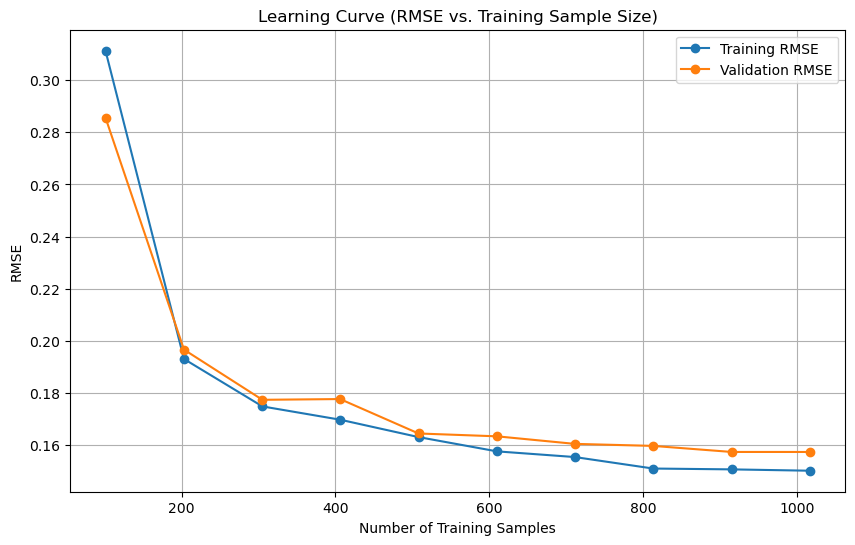

In [40]:
# Define training subset fractions (e.g., 10%, 20%, ..., 100% of training data)
train_fractions = np.linspace(0.1, 1.0, 10)  # 10 intervals
train_sizes = (len(s_train_X) * train_fractions).astype(int)

# Store RMSE values
train_rmse, val_rmse = [], []

for size in train_sizes:
    # Extract subset of training data (first `size` samples)
    X_subset = s_train_X[:size]
    y_subset = s_train_y[:size].ravel()  # Flatten target

    # Train model on subset
    model = RandomForestRegressor(**rf_params)
    model.fit(X_subset, y_subset)

    # Predict on training subset (to check training performance)
    pred_train = model.predict(X_subset)
    inv_pred_train = t_trans.inverse_transform(pred_train.reshape(-1, 1))
    rmse_train = np.sqrt(mean_squared_error(train_y.iloc[:size], inv_pred_train))
    train_rmse.append(rmse_train)

    # Predict on fixed validation set (to check generalization)
    pred_val = model.predict(s_val_X)
    inv_pred_val = t_trans.inverse_transform(pred_val.reshape(-1, 1))
    rmse_val = np.sqrt(mean_squared_error(val_y, inv_pred_val))
    val_rmse.append(rmse_val)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse, 'o-', label='Validation RMSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('RMSE')
plt.title('Learning Curve (RMSE vs. Training Sample Size)')
plt.legend()
plt.grid(True)
plt.show()

# XGB

In [41]:
xgb_params = {
    'n_estimators': 500,
    'max_depth': 5,                 
    'learning_rate': 0.02,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'gamma':1.5,
    'min_child_weight': 10,
    'reg_alpha': 12,
    'reg_lambda': 12,
    'random_state': 0
}


xgb_model = XGBRegressor(**xgb_params)

xgb_model.fit(s_train_X, s_train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=1.5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=10, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
# Training performance
train_pred_xgb = xgb_model.predict(s_train_X)
inv_train_pred_xgb = t_trans.inverse_transform(train_pred_xgb.reshape(-1, 1))
mae_train = mean_absolute_error(train_y, inv_train_pred_xgb)
rmse_train = np.sqrt(mean_squared_error(train_y, inv_train_pred_xgb))
r2_train = r2_score(train_y, inv_train_pred_xgb)
nrmse_train = rmse_train / np.std(train_y.to_numpy().ravel())
print("\nTraining Performance:")
print(f"MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, NRMSE: {nrmse_train:.4f}, R²: {r2_train:.4f}")
# Validate and calculate metrics
val_pred_xgb = xgb_model.predict(s_val_X)
inv_val_pred_xgb = t_trans.inverse_transform(val_pred_xgb.reshape(-1, 1))
mae_xgb = mean_absolute_error(val_y, inv_val_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(val_y, inv_val_pred_xgb))
r2_xgb = r2_score(val_y, inv_val_pred_xgb)
nrmse_val = rmse_xgb / np.std(val_y.to_numpy().ravel())
print("\nValidation Performance:")
print(f"MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}, NRMSE: {nrmse_val:.4f}, R²: {r2_xgb:.4f}")


Training Performance:
MAE: 0.1064, RMSE: 0.1431, NRMSE: 0.4806, R²: 0.7691

Validation Performance:
MAE: 0.1198, RMSE: 0.1516, NRMSE: 0.5166, R²: 0.7331


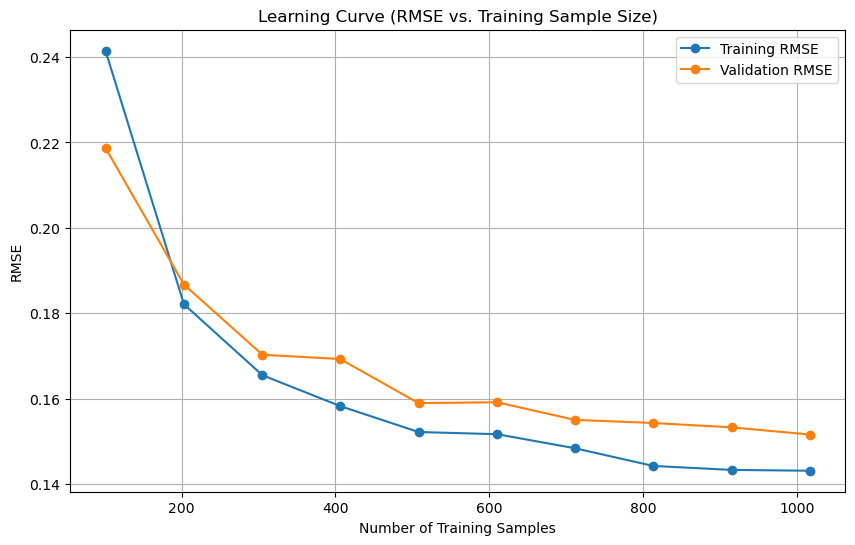

In [43]:
# Define training subset fractions (e.g., 10%, 20%, ..., 100% of training data)
train_fractions = np.linspace(0.1, 1.0, 10)  # 10 intervals
train_sizes = (len(s_train_X) * train_fractions).astype(int)

# Store RMSE values
train_rmse, val_rmse = [], []

for size in train_sizes:
    # Extract subset of training data (first `size` samples)
    X_subset = s_train_X[:size]
    y_subset = s_train_y[:size].ravel()  # Flatten target

    # Train model on subset
    model = XGBRegressor(**xgb_params)
    model.fit(X_subset, y_subset, eval_set=[(s_val_X, s_val_y)], verbose=False)


    # Predict on training subset (to check training performance)
    pred_train = model.predict(X_subset)
    inv_pred_train = t_trans.inverse_transform(pred_train.reshape(-1, 1))
    rmse_train = np.sqrt(mean_squared_error(train_y.iloc[:size], inv_pred_train))
    train_rmse.append(rmse_train)

    # Predict on fixed validation set (to check generalization)
    pred_val = model.predict(s_val_X)
    inv_pred_val = t_trans.inverse_transform(pred_val.reshape(-1, 1))
    rmse_val = np.sqrt(mean_squared_error(val_y, inv_pred_val))
    val_rmse.append(rmse_val)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse, 'o-', label='Validation RMSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('RMSE')
plt.title('Learning Curve (RMSE vs. Training Sample Size)')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
plot_prediction_and_true_data(val_y, inv_val_pred_xgb, True)

# Desicion Tree

In [45]:
dt_params = {
    'max_depth': 4,                 
    'min_samples_split': 20,        
    'min_samples_leaf': 20,         
    'max_features': 0.6,             
    'criterion': 'absolute_error',
    'ccp_alpha': 0.008,             
    'random_state': 0
}

DT_model = DecisionTreeRegressor(**dt_params)

# Train
DT_model.fit(s_train_X, s_train_y)

DecisionTreeRegressor(ccp_alpha=0.008, criterion='absolute_error', max_depth=4,
                      max_features=0.6, min_samples_leaf=20,
                      min_samples_split=20, random_state=0)

In [46]:
# Training performance
train_pred_dt = DT_model.predict(s_train_X)
inv_train_pred_dt = t_trans.inverse_transform(train_pred_dt.reshape(-1, 1))
mae_train = mean_absolute_error(train_y, inv_train_pred_dt)
rmse_train = np.sqrt(mean_squared_error(train_y, inv_train_pred_dt))
r2_train = r2_score(train_y, inv_train_pred_dt)
nrmse_train = rmse_train / np.std(train_y.to_numpy().ravel())

print("\nTraining Performance:")
print(f"MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, NRMSE: {nrmse_train:.4f}, R²: {r2_train:.4f}")

# Validation performance
val_pred_dt = DT_model.predict(s_val_X)
inv_val_pred_dt = t_trans.inverse_transform(val_pred_dt.reshape(-1, 1))
mae_dt = mean_absolute_error(val_y, inv_val_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(val_y, inv_val_pred_dt))
r2_dt = r2_score(val_y, inv_val_pred_dt)
nrmse_val = rmse_dt / np.std(val_y.to_numpy().ravel())

print("\nValidation Performance:")
print(f"DT - MAE: {mae_dt:.4f}, RMSE: {rmse_dt:.4f}, NRMSE: {nrmse_val:.4f}, R²: {r2_dt:.4f}")



Training Performance:
MAE: 0.1162, RMSE: 0.1612, NRMSE: 0.5413, R²: 0.7070

Validation Performance:
DT - MAE: 0.1310, RMSE: 0.1704, NRMSE: 0.5808, R²: 0.6627


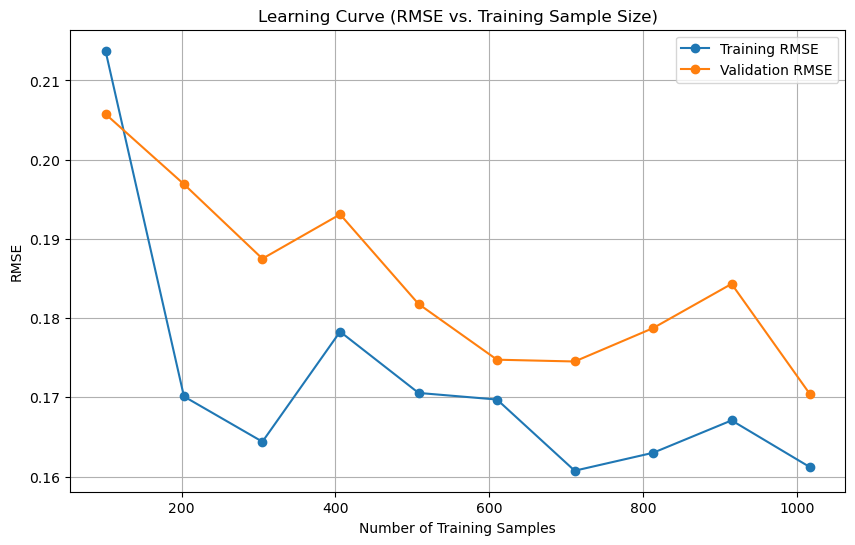

In [47]:
# Define training subset fractions (e.g., 10%, 20%, ..., 100% of training data)
train_fractions = np.linspace(0.1, 1.0, 10)  # 10 intervals
train_sizes = (len(s_train_X) * train_fractions).astype(int)

# Store RMSE values
train_rmse, val_rmse = [], []

for size in train_sizes:
    # Extract subset of training data (first `size` samples)
    X_subset = s_train_X[:size]
    y_subset = s_train_y[:size].ravel()  # Flatten target

    # Train model on subset
    model = DecisionTreeRegressor(**dt_params)
    model.fit(X_subset, y_subset)

    # Predict on training subset (to check training performance)
    pred_train = model.predict(X_subset)
    inv_pred_train = t_trans.inverse_transform(pred_train.reshape(-1, 1))
    rmse_train = np.sqrt(mean_squared_error(train_y.iloc[:size], inv_pred_train))
    train_rmse.append(rmse_train)

    # Predict on fixed validation set (to check generalization)
    pred_val = model.predict(s_val_X)
    inv_pred_val = t_trans.inverse_transform(pred_val.reshape(-1, 1))
    rmse_val = np.sqrt(mean_squared_error(val_y, inv_pred_val))
    val_rmse.append(rmse_val)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse, 'o-', label='Validation RMSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('RMSE')
plt.title('Learning Curve (RMSE vs. Training Sample Size)')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
plot_prediction_and_true_data(val_y, inv_val_pred_dt, True)

# Gradient Boosting

In [49]:
gbr_params = {
    'n_estimators': 350,
    'learning_rate': 0.03,
    'max_depth': 2,
    'min_samples_split': 50,
    'min_samples_leaf': 50,
    'max_features': 0.5,
    'subsample': 0.5,
    'random_state': 0
}

# Initialize the model with corrected parameters
GBR_model = GradientBoostingRegressor(**gbr_params)

# Train the model
GBR_model.fit(s_train_X, s_train_y)

GradientBoostingRegressor(learning_rate=0.03, max_depth=2, max_features=0.5,
                          min_samples_leaf=50, min_samples_split=50,
                          n_estimators=350, random_state=0, subsample=0.5)

In [50]:
# Training performance
train_pred_gbr = GBR_model.predict(s_train_X)
inv_train_pred_gbr = t_trans.inverse_transform(train_pred_gbr.reshape(-1, 1))
mae_train = mean_absolute_error(train_y, inv_train_pred_gbr)
rmse_train = np.sqrt(mean_squared_error(train_y, inv_train_pred_gbr))
r2_train = r2_score(train_y, inv_train_pred_gbr)
nrmse_train = rmse_train / np.std(train_y.to_numpy().ravel())

print("\nTraining Performance:")
print(f"MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, NRMSE: {nrmse_train:.4f}, R²: {r2_train:.4f}")
# Validate and calculate metrics
val_pred_gbr = GBR_model.predict(s_val_X)
inv_val_pred_gbr = t_trans.inverse_transform(val_pred_gbr.reshape(-1, 1))
mae_gbr = mean_absolute_error(val_y, inv_val_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(val_y, inv_val_pred_gbr))
r2_gbr = r2_score(val_y, inv_val_pred_gbr)
nrmse_val = rmse_gbr / np.std(val_y.to_numpy().ravel())

print("\nValidation Performance:")
print(f"GBR - MAE: {mae_gbr:.4f}, RMSE: {rmse_gbr:.4f}, NRMSE: {nrmse_val:.4f}, R²: {r2_gbr:.4f}")


Training Performance:
MAE: 0.1005, RMSE: 0.1343, NRMSE: 0.4512, R²: 0.7965

Validation Performance:
GBR - MAE: 0.1161, RMSE: 0.1506, NRMSE: 0.5132, R²: 0.7366


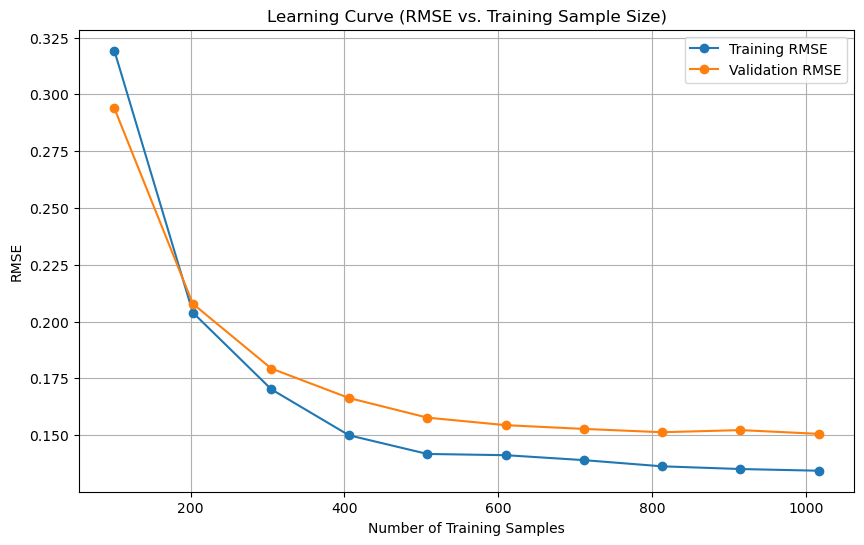

In [51]:
# Define training subset fractions (e.g., 10%, 20%, ..., 100% of training data)
train_fractions = np.linspace(0.1, 1.0, 10)  # 10 intervals
train_sizes = (len(s_train_X) * train_fractions).astype(int)

# Store RMSE values
train_rmse, val_rmse = [], []

for size in train_sizes:
    # Extract subset of training data (first `size` samples)
    X_subset = s_train_X[:size]
    y_subset = s_train_y[:size].ravel()  # Flatten target

    # Train model on subset
    model = GradientBoostingRegressor(**gbr_params)
    model.fit(X_subset, y_subset)

    # Predict on training subset (to check training performance)
    pred_train = model.predict(X_subset)
    inv_pred_train = t_trans.inverse_transform(pred_train.reshape(-1, 1))
    rmse_train = np.sqrt(mean_squared_error(train_y.iloc[:size], inv_pred_train))
    train_rmse.append(rmse_train)

    # Predict on fixed validation set (to check generalization)
    pred_val = model.predict(s_val_X)
    inv_pred_val = t_trans.inverse_transform(pred_val.reshape(-1, 1))
    rmse_val = np.sqrt(mean_squared_error(val_y, inv_pred_val))
    val_rmse.append(rmse_val)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse, 'o-', label='Validation RMSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('RMSE')
plt.title('Learning Curve (RMSE vs. Training Sample Size)')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
plot_prediction_and_true_data(val_y, inv_val_pred_gbr, True)

# SVR

In [53]:
svr_params = {
    'kernel':'rbf',
    'C': 2,
    'gamma': 0.01,
    'epsilon': 0.2
}
SVR_model = SVR(**svr_params)

# Train
SVR_model.fit(s_train_X, s_train_y)

SVR(C=2, epsilon=0.2, gamma=0.01)

In [54]:
# Training performance
train_pred_svr = SVR_model.predict(s_train_X)
inv_train_pred_svr = t_trans.inverse_transform(train_pred_svr.reshape(-1, 1))
mae_train = mean_absolute_error(train_y, inv_train_pred_svr)
rmse_train = np.sqrt(mean_squared_error(train_y, inv_train_pred_svr))
r2_train = r2_score(train_y, inv_train_pred_svr)
nrmse_train = rmse_train / np.std(train_y.to_numpy().ravel())

# Validation performance
val_pred_svr = SVR_model.predict(s_val_X)
inv_val_pred_svr = t_trans.inverse_transform(val_pred_svr.reshape(-1, 1))
mae_svr = mean_absolute_error(val_y, inv_val_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(val_y, inv_val_pred_svr))
r2_svr = r2_score(val_y, inv_val_pred_svr)
nrmse_val = rmse_svr / np.std(val_y.to_numpy().ravel())

print("\nTraining Performance:")
print(f"MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, nRMSE: {nrmse_train:.4f}, R²: {r2_train:.4f}")

print("\nValidation Performance:")
print(f"MAE: {mae_svr:.4f}, RMSE: {rmse_svr:.4f}, nRMSE: {nrmse_val:.4f}, R²: {r2_svr:.4f}")




Training Performance:
MAE: 0.1056, RMSE: 0.1464, nRMSE: 0.4916, R²: 0.7583

Validation Performance:
MAE: 0.1121, RMSE: 0.1460, nRMSE: 0.4976, R²: 0.7524


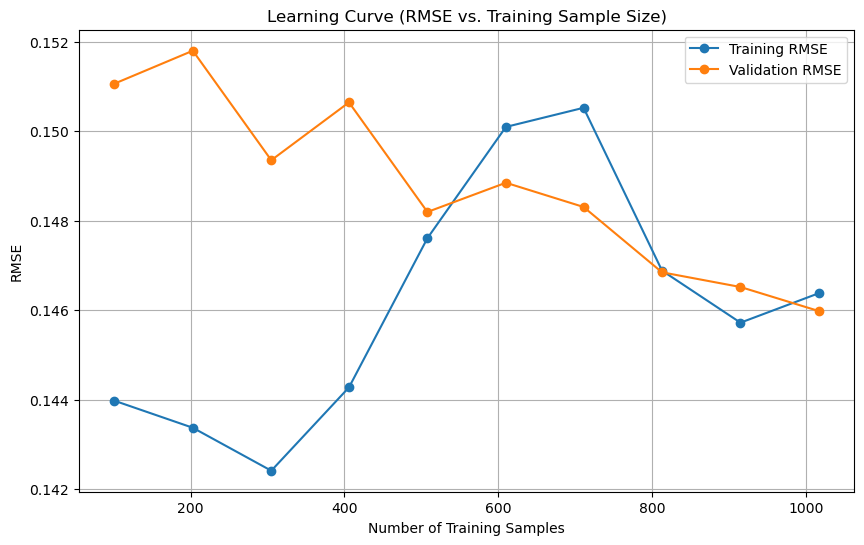

In [55]:
# Define training subset fractions (e.g., 10%, 20%, ..., 100% of training data)
train_fractions = np.linspace(0.1, 1.0, 10)  # 10 intervals
train_sizes = (len(s_train_X) * train_fractions).astype(int)

# Store RMSE values
train_rmse, val_rmse = [], []

for size in train_sizes:
    # Extract subset of training data (first `size` samples)
    X_subset = s_train_X[:size]
    y_subset = s_train_y[:size].ravel()  # Flatten target

    # Train model on subset
    model = SVR(**svr_params)
    model.fit(X_subset, y_subset)

    # Predict on training subset (to check training performance)
    pred_train = model.predict(X_subset)
    inv_pred_train = t_trans.inverse_transform(pred_train.reshape(-1, 1))
    rmse_train = np.sqrt(mean_squared_error(train_y.iloc[:size], inv_pred_train))
    train_rmse.append(rmse_train)

    # Predict on fixed validation set (to check generalization)
    pred_val = model.predict(s_val_X)
    inv_pred_val = t_trans.inverse_transform(pred_val.reshape(-1, 1))
    rmse_val = np.sqrt(mean_squared_error(val_y, inv_pred_val))
    val_rmse.append(rmse_val)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse, 'o-', label='Validation RMSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('RMSE')
plt.title('Learning Curve (RMSE vs. Training Sample Size)')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
plot_prediction_and_true_data(val_y, inv_val_pred_svr, True)

# MLPR

In [57]:
mlp_params= {
    'hidden_layer_sizes': (128, 64),
    'activation': 'tanh',         
    'solver': 'adam',
    'alpha': 0.0005,
    'learning_rate_init': 0.0005,
    'learning_rate': 'adaptive',
    'batch_size': 128,
    'max_iter': 5000,
    'tol': 1e-6,
    'early_stopping': True,
    'validation_fraction': 0.2,
    'n_iter_no_change': 25,
    'random_state': 0
}
MLP_model = MLPRegressor(**mlp_params)
MLP_model.fit(s_train_X, s_train_y)

MLPRegressor(activation='tanh', alpha=0.0005, batch_size=128,
             early_stopping=True, hidden_layer_sizes=(128, 64),
             learning_rate='adaptive', learning_rate_init=0.0005, max_iter=5000,
             n_iter_no_change=25, random_state=0, tol=1e-06,
             validation_fraction=0.2)

In [58]:
# Training performance
train_pred_mlp = MLP_model.predict(s_train_X)
inv_train_pred_mlp = t_trans.inverse_transform(train_pred_mlp.reshape(-1, 1))
mae_train = mean_absolute_error(train_y, inv_train_pred_mlp)
rmse_train = np.sqrt(mean_squared_error(train_y, inv_train_pred_mlp))
r2_train = r2_score(train_y, inv_train_pred_mlp)
nrmse_train = rmse_train / np.std(train_y.to_numpy().ravel())

# Validate and calculate metrics
val_pred_mlp = MLP_model.predict(s_val_X)
inv_val_pred_mlp = t_trans.inverse_transform(val_pred_mlp.reshape(-1, 1))
mae_mlp = mean_absolute_error(val_y, inv_val_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(val_y, inv_val_pred_mlp))
r2_mlp = r2_score(val_y, inv_val_pred_mlp)
nrmse_val = rmse_mlp / np.std(val_y.to_numpy().ravel())

print("\nTraining Performance:")
print(f"MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, nRMSE: {nrmse_train:.4f}, R²: {r2_train:.4f}")

print("\nValidation Performance:")
print(f"MAE: {mae_gbr:.4f}, RMSE: {rmse_gbr:.4f}, nRMSE: {nrmse_val:.4f}, R²: {r2_gbr:.4f}")


Training Performance:
MAE: 0.1017, RMSE: 0.1384, nRMSE: 0.4648, R²: 0.7840

Validation Performance:
MAE: 0.1161, RMSE: 0.1506, nRMSE: 0.5102, R²: 0.7366


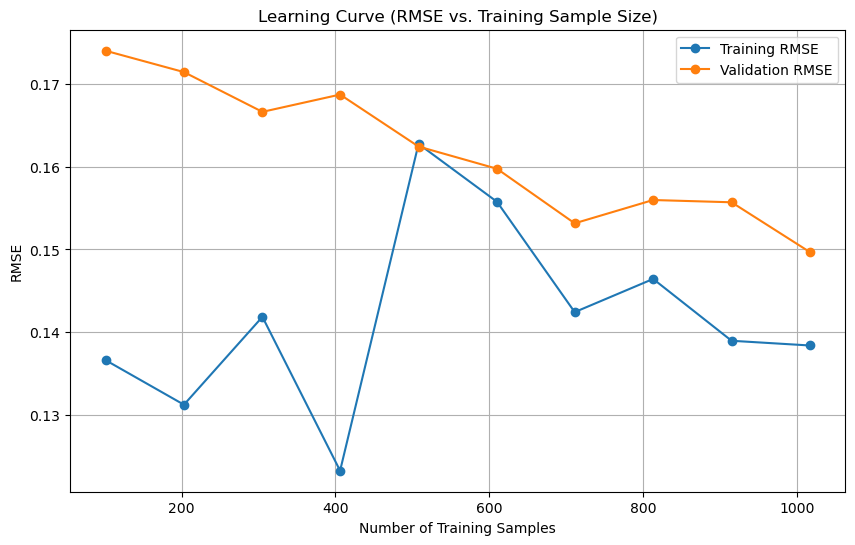

In [59]:
# Define training subset fractions (e.g., 10%, 20%, ..., 100% of training data)
train_fractions = np.linspace(0.1, 1.0, 10)  # 10 intervals
train_sizes = (len(s_train_X) * train_fractions).astype(int)

# Store RMSE values
train_rmse, val_rmse = [], []

for size in train_sizes:
    # Extract subset of training data (first `size` samples)
    X_subset = s_train_X[:size]
    y_subset = s_train_y[:size].ravel()  # Flatten target

    # Train model on subset
    model = MLPRegressor(**mlp_params)
    model.fit(X_subset, y_subset)

    # Predict on training subset (to check training performance)
    pred_train = model.predict(X_subset)
    inv_pred_train = t_trans.inverse_transform(pred_train.reshape(-1, 1))
    rmse_train = np.sqrt(mean_squared_error(train_y.iloc[:size], inv_pred_train))
    train_rmse.append(rmse_train)

    # Predict on fixed validation set (to check generalization)
    pred_val = model.predict(s_val_X)
    inv_pred_val = t_trans.inverse_transform(pred_val.reshape(-1, 1))
    rmse_val = np.sqrt(mean_squared_error(val_y, inv_pred_val))
    val_rmse.append(rmse_val)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse, 'o-', label='Validation RMSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('RMSE')
plt.title('Learning Curve (RMSE vs. Training Sample Size)')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
plot_prediction_and_true_data(val_y, inv_val_pred_mlp, True)

# ANN_attention

In [61]:

# Define a custom attention layer
def attention_layer(inputs):
    # Compute attention scores
    attention_probs = Dense(128, activation='softmax', name="AttentionScores")(inputs)
    # Apply attention to the inputs
    attention_output = Multiply(name="AttentionApplied")([inputs, attention_probs])
    return attention_output

# Build the model
input_layer = Input(shape=(s_train_X.shape[1],))
x = Dense(128, activation='relu',kernel_regularizer=l2(0.001))(input_layer)  # L2 regularizatio
x = Dropout(0.1)(x)
# Add attention after the first hidden layer
x = attention_layer(x)

x = Dense(64, activation='relu',kernel_regularizer=l2(0.001))(x)
x = Dropout(0.1)(x)
 
output_layer = Dense(1)(x)  # Regression output

enhanced_model = Model(inputs=input_layer, outputs=output_layer)


I0000 00:00:1752749712.604210   52175 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3478 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1


In [62]:
enhanced_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mae']
)
enhanced_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 16)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      2,176 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ AttentionScores     │ (None, 128)       │     16,512 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ AttentionApplied    │ (None, 128)       │          0 │ dropout[0][0],    │
│ (Multiply)          │                   │            │ AttentionScores[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ AttentionApplied… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,009 (105.50 KB)

 Trainable params: 27,009 (105.50 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,  # Increased from 5
    min_lr=1e-6,
    cooldown=2,  # New parameter to prevent aggressive LR drops
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = enhanced_model.fit(
    s_train_X, s_train_y,
    validation_data=(s_val_X, s_val_y),
    epochs=1000,
    batch_size=128,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

Epoch 1/1000


2025-07-17 12:55:13.733396: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 1.1082 - mae: 0.7384 - val_loss: 1.0613 - val_mae: 0.7347 - learning_rate: 5.0000e-04
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0883 - mae: 0.7331 - val_loss: 1.0393 - val_mae: 0.7283 - learning_rate: 5.0000e-04
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0650 - mae: 0.7258 - val_loss: 1.0094 - val_mae: 0.7184 - learning_rate: 5.0000e-04
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0317 - mae: 0.7146 - val_loss: 0.9648 - val_mae: 0.7031 - learning_rate: 5.0000e-04
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9835 - mae: 0.6972 - val_loss: 0.9012 - val_mae: 0.6798 - learning_rate: 5.0000e-04
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9164 - mae: 0.6714 - val_loss: 0.8211 - val_mae: 0.6494 - learning_rate: 5.0000e-04
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8438 - mae: 0.6424 - val_loss: 0.7320 - val_mae: 0.6152 - learning_rate: 5.0000e-0

In [64]:
# Predict on training set
train_pred = enhanced_model.predict(s_train_X)
inv_train_pred = t_trans.inverse_transform(train_pred)
inv_train_true = t_trans.inverse_transform(s_train_y.reshape(-1, 1))

# Calculate metrics for training
train_mae = mean_absolute_error(inv_train_true, inv_train_pred)
train_rmse = np.sqrt(mean_squared_error(inv_train_true, inv_train_pred))
train_r2 = r2_score(inv_train_true, inv_train_pred)
train_std = np.std(inv_train_true)
train_nrmse = train_rmse / train_std

print(f"Train MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}, nRMSE: {train_nrmse:.4f}")

# Predict on validation set
val_pred = enhanced_model.predict(s_val_X)
inv_val_pred = t_trans.inverse_transform(val_pred)
inv_val_true = t_trans.inverse_transform(s_val_y.reshape(-1, 1))

# Calculate metrics for validation
val_mae = mean_absolute_error(inv_val_true, inv_val_pred)
rmse_enhanced = np.sqrt(mean_squared_error(inv_val_true, inv_val_pred))
val_r2 = r2_score(inv_val_true, inv_val_pred)
val_std = np.std(inv_val_true)
val_nrmse = rmse_enhanced / val_std

print(f"Validation MAE: {val_mae:.4f}, RMSE: {rmse_enhanced:.4f}, R²: {val_r2:.4f}, nRMSE: {val_nrmse:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


2025-07-17 12:55:38.865143: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Train MAE: 0.0996, RMSE: 0.1353, R²: 0.7934, nRMSE: 0.4545
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Validation MAE: 0.1100, RMSE: 0.1422, R²: 0.7652, nRMSE: 0.4845


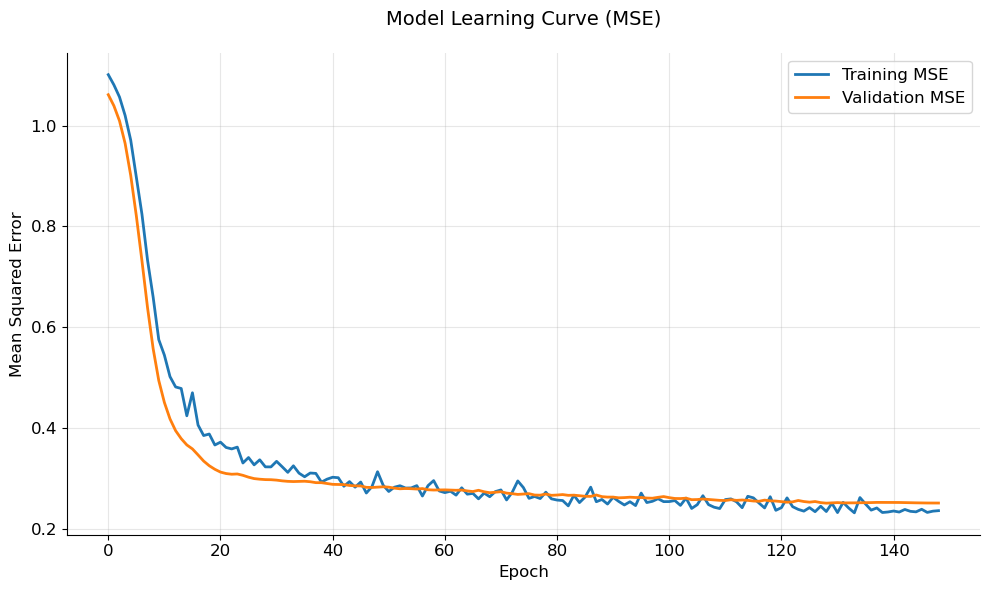

In [65]:
def plot_mse_curve(history):
    plt.figure(figsize=(10, 6))
    
    # Plot training & validation loss
    plt.plot(history.history['loss'], 
             label='Training MSE',
             linewidth=2,
             color='#1f77b4')  # Blue
    
    plt.plot(history.history['val_loss'], 
             label='Validation MSE',
             linewidth=2,
             color='#ff7f0e')  # Orange
    
    # Styling for presentations
    plt.title('Model Learning Curve (MSE)', fontsize=14, pad=20)
    plt.ylabel('Mean Squared Error', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(fontsize=12, frameon=True, facecolor='white')
    plt.grid(True, alpha=0.3)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Usage (after model training):
plot_mse_curve(history)

In [66]:
plot_prediction_and_true_data(val, inv_val_pred)

# Ensemble

In [67]:
model_rmse = {
    'rf': rmse_rf,
    'xgb': rmse_xgb,
    'dt': rmse_dt,
    'gbr': rmse_gbr,
    'svr': rmse_svr,
    'mlp': rmse_mlp
}

# Sort models by RMSE and select top two
sorted_models = sorted(model_rmse.items(), key=lambda x: x[1])
best_two = sorted_models[:2]
best_two_names = [model[0] for model in best_two]

In [68]:
model_map = {
    'rf': RandomForestRegressor(**rf_params),
    'xgb': XGBRegressor(**xgb_params),
    'dt': DecisionTreeRegressor(**dt_params),
    'gbr': GradientBoostingRegressor(**gbr_params),
    'svr': SVR(**svr_params),
    'mlp': MLPRegressor(**mlp_params)
}

# Select the two best models
best_estimators = [(name, model_map[name]) for name in best_two_names]
print(best_estimators)

[('svr', SVR(C=2, epsilon=0.2, gamma=0.01)), ('mlp', MLPRegressor(activation='tanh', alpha=0.0005, batch_size=128,
             early_stopping=True, hidden_layer_sizes=(128, 64),
             learning_rate='adaptive', learning_rate_init=0.0005, max_iter=5000,
             n_iter_no_change=25, random_state=0, tol=1e-06,
             validation_fraction=0.2))]


In [69]:
svr_mlp = VotingRegressor(estimators=best_estimators)
svr_mlp.fit(s_train_X, s_train_y)  # Retrains the models within the ensemble

VotingRegressor(estimators=[('svr', SVR(C=2, epsilon=0.2, gamma=0.01)),
                            ('mlp',
                             MLPRegressor(activation='tanh', alpha=0.0005,
                                          batch_size=128, early_stopping=True,
                                          hidden_layer_sizes=(128, 64),
                                          learning_rate='adaptive',
                                          learning_rate_init=0.0005,
                                          max_iter=5000, n_iter_no_change=25,
                                          random_state=0, tol=1e-06,
                                          validation_fraction=0.2))])

In [70]:

# Training predictions (scaled back to original)
train_pred_scaled = svr_mlp .predict(s_train_X)
train_pred = t_trans.inverse_transform(train_pred_scaled.reshape(-1, 1))

# Training metrics
train_mae = mean_absolute_error(train_y, train_pred)
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
train_r2 = r2_score(train_y, train_pred)
nrmse_train=train_rmse/np.std(train_y.to_numpy().ravel())
# Validation predictions
val_pred_voting = svr_mlp .predict(s_val_X)
inv_val_pred_voting = t_trans.inverse_transform(val_pred_voting.reshape(-1, 1))

# Calculate metrics
mae_voting = mean_absolute_error(val_y, inv_val_pred_voting)
rmse_voting = np.sqrt(mean_squared_error(val_y, inv_val_pred_voting))
nrmse_val=rmse_voting/np.std(val_y.to_numpy().ravel())
r2_voting = r2_score(val_y, inv_val_pred_voting)
print("Voting Ensemble training Performance:")
print(f"MAE: {train_mae}, RMSE: {train_rmse}, NRMSE: {train_nrmse}, R²: {train_r2}")
print("Voting Ensemble  validation Performance:")
print(f"MAE: {mae_voting}, RMSE: {rmse_voting}, NRMSE: {nrmse_val}, R²: {r2_voting}")

Voting Ensemble training Performance:
MAE: 0.10238244534064263, RMSE: 0.1408524652435627, NRMSE: 0.45453400033888663, R²: 0.7762296943988378
Voting Ensemble  validation Performance:
MAE: 0.11204628829438508, RMSE: 0.1463148803474996, NRMSE: 0.49871085266449544, R²: 0.7512874854346518


# metrics

In [71]:
train_y=train_y.to_numpy().ravel()
val_y=val_y.to_numpy().ravel()

In [72]:
# Define a function to calculate all metrics
def calculate_metrics(y_true, y_pred, dataset_type):
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'NRMSE (std)': np.sqrt(mean_squared_error(y_true, y_pred)) / np.std(y_true),
        'R2': r2_score(y_true, y_pred)
    }
    return {f'{dataset_type}_{k}': v for k,v in metrics.items()}

# Initialize a dictionary to store results
results = []

# List of models (add your other models here)
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Decision Tree': DT_model,
    'Gradient Boosting': GBR_model,
    'SVR': SVR_model,
    'MLP': MLP_model,
    'svr_mlp':svr_mlp,
    'ANN':enhanced_model
}

# Calculate metrics for each model
for model_name, model in models.items():
    # Train predictions
    train_pred = model.predict(s_train_X)
    inv_train_pred = t_trans.inverse_transform(train_pred.reshape(-1, 1))
    train_metrics = calculate_metrics(train_y, inv_train_pred, 'Train')

    # Validation predictions
    val_pred = model.predict(s_val_X)
    inv_val_pred = t_trans.inverse_transform(val_pred.reshape(-1, 1))
    val_metrics = calculate_metrics(val_y, inv_val_pred, 'Val')

    # Combine results
    results.append({
        'Model': model_name,
        **train_metrics,
        **val_metrics
    })



# Create DataFrame
metrics_df = pd.DataFrame(results)

# Reorder columns for better readability
column_order = ['Model'] + \
              [f'Train_{m}' for m in ['MAE', 'RMSE', 'NRMSE (std)', 'R2']] + \
              [f'Val_{m}' for m in ['MAE', 'RMSE', 'NRMSE (std)', 'R2']]

metrics_df = metrics_df[column_order]
metrics_df

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Model  Train_MAE  Train_RMSE  Train_NRMSE (std)  Train_R2  \
0      Random Forest   0.109170    0.150200           0.504435  0.745545   
1            XGBoost   0.106429    0.143094           0.480572  0.769050   
2      Decision Tree   0.116178    0.161180           0.541311  0.706983   
3  Gradient Boosting   0.100535    0.134338           0.451164  0.796451   
4                SVR   0.105607    0.146378           0.491599  0.758330   
5                MLP   0.101738    0.138387           0.464763  0.783995   
6            svr_mlp   0.102382    0.140852           0.473044  0.776230   
7                ANN   0.099575    0.135341           0.454534  0.793399   

    Val_MAE  Val_RMSE  Val_NRMSE (std)    Val_R2  
0  0.123798  0.157394         0.536474  0.712196  
1  0.119782  0.151572         0.516630  0.733094  
2  0.131008  0.170384         0.580752  0.662728  
3  0.116088  0.150565         0.513197  0.736629  
4  0.112083  0.145977         0.497560  0.752434  
5  0.114017  0.149673         0.510156  0.739741  
6  0.112046  0.146315         0.498711  0.751287  
7  0.110008  0.142158         0.484542  0.765219

# Retrain all model on train+val data

In [73]:
# Combine scaled features 
s_full_X = np.concatenate([s_train_X, s_val_X], axis=0)
s_full_y = np.concatenate([s_train_y, s_val_y], axis=0)

In [74]:

rf_model= RandomForestRegressor(**rf_params)
rf_model.fit(s_full_X, s_full_y)  
xgb_model = XGBRegressor(**xgb_params)
xgb_model.fit(s_full_X, s_full_y)  
DT_model = DecisionTreeRegressor(**dt_params)
DT_model.fit(s_full_X, s_full_y)
GBR_model = GradientBoostingRegressor(**gbr_params)
GBR_model.fit(s_full_X, s_full_y)
SVR_model = SVR(**svr_params)
SVR_model.fit(s_full_X, s_full_y)
MLP_model = MLPRegressor(**mlp_params)
MLP_model.fit(s_full_X, s_full_y)
svr_mlp.fit(s_full_X, s_full_y)


VotingRegressor(estimators=[('svr', SVR(C=2, epsilon=0.2, gamma=0.01)),
                            ('mlp',
                             MLPRegressor(activation='tanh', alpha=0.0005,
                                          batch_size=128, early_stopping=True,
                                          hidden_layer_sizes=(128, 64),
                                          learning_rate='adaptive',
                                          learning_rate_init=0.0005,
                                          max_iter=5000, n_iter_no_change=25,
                                          random_state=0, tol=1e-06,
                                          validation_fraction=0.2))])

In [75]:
# Rebuild the ANN model architecture
final_model = tf.keras.models.clone_model(enhanced_model)
final_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mae']
)


In [76]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',
    factor=0.5,
    patience=10,  
    min_lr=1e-6,
    cooldown=3, 
    verbose=1
)
train_loss_stop = EarlyStopping(
    monitor='loss',
    patience=25,  
    min_delta=0.001,
    restore_best_weights=True
)

final_model.fit(
    s_full_X,
    s_full_y,
    epochs=1000,
    batch_size=128,
    callbacks=[train_loss_stop,lr_scheduler],  
    verbose=1
)

Epoch 1/1000


2025-07-17 12:55:53.426501: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0492 - mae: 0.7355 - learning_rate: 5.0000e-04
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0319 - mae: 0.7303 - learning_rate: 5.0000e-04
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0118 - mae: 0.7235 - learning_rate: 5.0000e-04
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9800 - mae: 0.7105 - learning_rate: 5.0000e-04
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9259 - mae: 0.6853 - learning_rate: 5.0000e-04
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8432 - mae: 0.6436 - learning_rate: 5.0000e-04
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7350 - mae: 0.5874 - learning_rate: 5.0000e-04
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6134 - mae: 0.5248 - learning_rate: 5.0000e-04
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5196 - mae: 0.4877 - learning_rate: 5.0000e-04
Epoch 10/1000
11/11 ━━━━━━━━━━━

# test

In [77]:
# 1. Define function to calculate metrics
def calculate_all_metrics(y_true, y_pred, dataset_type):
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'NRMSE (std)': np.sqrt(mean_squared_error(y_true, y_pred)) / np.std(y_true),
        'R2': r2_score(y_true, y_pred)
    }
    return {f'{dataset_type}_{k}': v for k,v in metrics.items()}

# 2. Prepare test data
other_test_y = test_y.to_numpy().ravel() 

# 3. Calculate test metrics
test_results = []

retrained_models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Decision Tree': DT_model,
    'Gradient Boosting': GBR_model,
    'SVR': SVR_model,
    'MLP': MLP_model,
    'svr_mlp':svr_mlp,
    'ANN':final_model
}

for model_name, model in retrained_models.items():
    test_pred = model.predict(s_test_X)
    inv_test_pred = t_trans.inverse_transform(test_pred.reshape(-1, 1))
    test_metrics = calculate_all_metrics(other_test_y, inv_test_pred, 'Test')
    test_results.append({'Model': model_name, **test_metrics})

# 4. Merge with existing metrics_df
test_metrics_df = pd.DataFrame(test_results)
metrics_df = metrics_df.merge(test_metrics_df, on='Model', how='left')

# 5. Reorder columns
new_order = []
for metric in ['MAE', 'RMSE', 'NRMSE (std)', 'R2']:
    for dataset in ['Train', 'Val', 'Test']:
        new_order.append(f'{dataset}_{metric}')

metrics_df = metrics_df[['Model'] + new_order]

# 6. Round values
metrics_df = metrics_df.round(4)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


2025-07-17 12:56:18.390310: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [78]:
metrics_df = metrics_df.sort_values(by='Test_NRMSE (std)', ascending=True).reset_index(drop=True)
metrics_df

Model  Train_MAE  Val_MAE  Test_MAE  Train_RMSE  Val_RMSE  \
0                ANN     0.0996   0.1100    0.1085      0.1353    0.1422   
1            svr_mlp     0.1024   0.1120    0.1112      0.1409    0.1463   
2                SVR     0.1056   0.1121    0.1120      0.1464    0.1460   
3                MLP     0.1017   0.1140    0.1140      0.1384    0.1497   
4  Gradient Boosting     0.1005   0.1161    0.1145      0.1343    0.1506   
5            XGBoost     0.1064   0.1198    0.1170      0.1431    0.1516   
6      Random Forest     0.1092   0.1238    0.1174      0.1502    0.1574   
7      Decision Tree     0.1162   0.1310    0.1401      0.1612    0.1704   

   Test_RMSE  Train_NRMSE (std)  Val_NRMSE (std)  Test_NRMSE (std)  Train_R2  \
0     0.1440             0.4545           0.4845            0.4730    0.7934   
1     0.1459             0.4730           0.4987            0.4791    0.7762   
2     0.1483             0.4916           0.4976            0.4869    0.7583   
3     0.1488             0.4648           0.5102            0.4888    0.7840   
4     0.1526             0.4512           0.5132            0.5011    0.7965   
5     0.1548             0.4806           0.5166            0.5084    0.7691   
6     0.1570             0.5044           0.5365            0.5155    0.7455   
7     0.1913             0.5413           0.5808            0.6282    0.7070   

   Val_R2  Test_R2  
0  0.7652   0.7763  
1  0.7513   0.7705  
2  0.7524   0.7629  
3  0.7397   0.7611  
4  0.7366   0.7489  
5  0.7331   0.7415  
6  0.7122   0.7343  
7  0.6627   0.6054

## Plot prediction and true data for ANN model-DAN

In [79]:
# Training performance
test_pred = final_model.predict(s_test_X) #ANN model-DAN
inv_test_pred = t_trans.inverse_transform(test_pred.reshape(-1, 1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [80]:
plot_prediction_and_true_data(test_y, inv_test_pred, True)

## Feature importantce with SHAP

PermutationExplainer explainer: 341it [00:39,  7.05it/s]                         


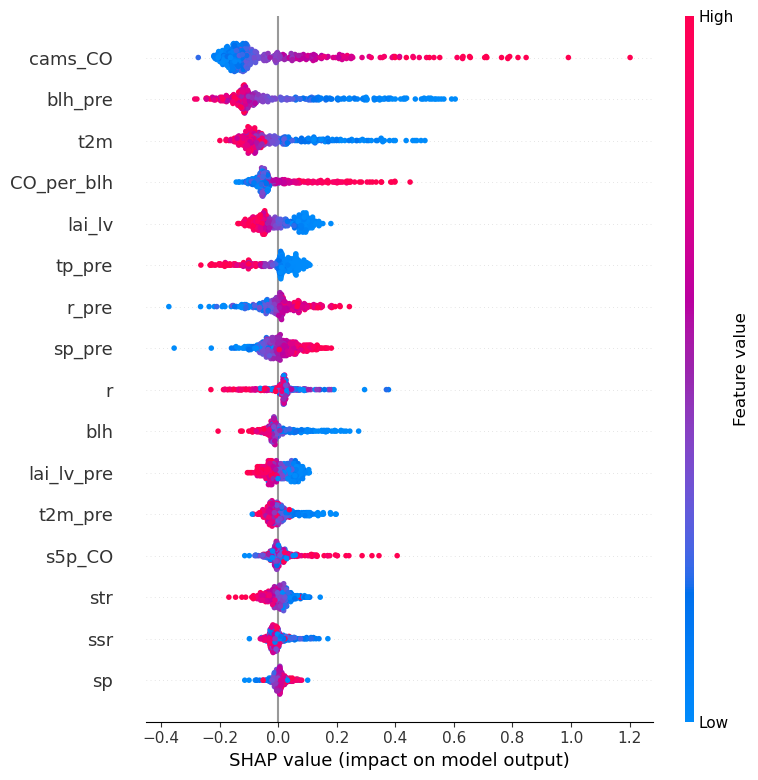

In [81]:
explainer = shap.Explainer(final_model, s_full_X)  # Might need s_train_X as background
shap_values = explainer(s_test_X)

# Summary plot
shap.summary_plot(shap_values, s_test_X, train_X.columns.to_list(),train_X.shape[1])

## Data Inspection

In [82]:
print("arpa_CO mean: " + str(df_complete["arpa_CO"].mean()))
print("arpa_CO median: " + str(df_complete["arpa_CO"].median()))
print("arpa_CO min: " + str(df_complete["arpa_CO"].min()))
print("arpa_CO max: " + str(df_complete["arpa_CO"].max()))
print("arpa_CO std.dev.: " + str(df_complete["arpa_CO"].std()) + "\n")

print(
    "train_y Mean: %.3f" % train_y.mean()
    + "\n"
    + "train_y Max: %.3f" % train_y.max()
    + "\n"
    + "train_y Min: %.3f" % train_y.min()
    + "\n"
    + "train_y St.Dev.: %.3f" % train_y.std()
    + "\n"
    + "\n"
    "val_y Mean: %.3f" % val_y.mean()
    + "\n"
    + "val_y Max: %.3f" % val_y.max()
    + "\n"
    + "val_y Min: %.3f" % val_y.min()
    + "\n"
    + "val_y St.Dev.: %.3f" % val_y.std()
    + "\n"
    + "\n"
    "test_y mean.: %.3f" % test_y.mean()
    + "\n"
    + "test_y max.: %.3f" % test_y.max()
    + "\n"
    + "test_y min.: %.3f" % test_y.min()
    + "\n"
    + "test_y St.Dev.: %.3f" % test_y.std()
    + "\n"
)

arpa_CO mean: 0.6587270464522808
arpa_CO median: 0.5705263157894737
arpa_CO min: 0.211578947368421
arpa_CO max: 2.1273684210526316
arpa_CO std.dev.: 0.2984720377585784

train_y Mean: 0.652
train_y Max: 2.127
train_y Min: 0.212
train_y St.Dev.: 0.298

val_y Mean: 0.663
val_y Max: 1.883
val_y Min: 0.267
val_y St.Dev.: 0.293

test_y mean.: 0.674
test_y max.: 2.116
test_y min.: 0.236
test_y St.Dev.: 0.305



## Statistical Test on performance - DAN vs SVR_MLP

In [83]:
# For ANN
ann_yhat = final_model.predict(s_test_X)
ann_inv_yhat = t_trans.inverse_transform(ann_yhat)  
ann_predictions = ann_inv_yhat.flatten()

# For SVR-MLP
svr_mlp_yhat = svr_mlp.predict(s_test_X)  
svr_mlp_inv_yhat = t_trans.inverse_transform(svr_mlp_yhat.reshape(-1, 1))  
svr_mlp_predictions = svr_mlp_inv_yhat.flatten()

test_y_inv = t_trans.inverse_transform(s_test_y.reshape(-1, 1))
actuals = test_y_inv.flatten()

# Calculate residuals 
ann_residuals = actuals - ann_predictions
svr_mlp_residuals = actuals - svr_mlp_predictions  

# Then compute squared errors
ann_se = ann_residuals ** 2
svr_mlp_se = svr_mlp_residuals ** 2  

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


2025-07-17 12:56:58.570818: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


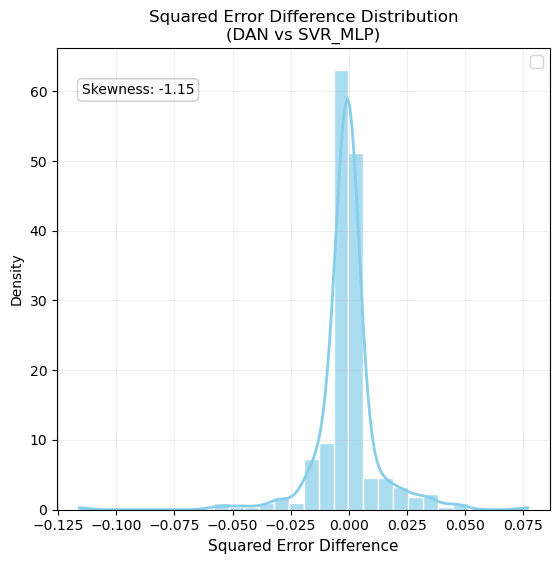

In [84]:
# Calculate error difference
diff_se = ann_se - svr_mlp_se

# Set up dual plot layout
plt.figure(figsize=(14, 6))

# 1. Histogram with KDE and Normal Overlay (using Seaborn)
plt.subplot(1, 2, 1)
ax = sns.histplot(diff_se, bins=30, kde=True, stat='density', 
                 color='skyblue', edgecolor='white', alpha=0.7,
                 line_kws={'lw': 2, 'color': 'navy'})


# Overlay normal distribution
plt.title('Squared Error Difference Distribution\n(DAN vs SVR_MLP)', fontsize=12)
plt.xlabel('Squared Error Difference', fontsize=11)
plt.legend(fontsize=11)
plt.grid(alpha=0.2)

# Add skewness/kurtosis info
skew = stats.skew(diff_se)
plt.annotate(f'Skewness: {skew:.2f}',
             xy=(0.05, 0.9), xycoords='axes fraction',
             bbox=dict(boxstyle='round', alpha=0.2, facecolor='white'))


plt.show()

In [85]:
# Check normality of error differences (for t-test)
diff_se = ann_se - svr_mlp_se
_, p_norm = shapiro(diff_se)
print(f"Normality p-value: {p_norm:.4f}")

if p_norm < 0.05:
    print("Warning: Differences not normal - consider Wilcoxon test")

Normality p-value: 0.0000


In [86]:
#Interpretation:
#H0​: Mean squared errors are equal (μANN=μsvr_mlp​).
#p<0.05 Significant difference in MSE.

In [87]:
# Calculate differences in absolute errors
d = ann_se - svr_mlp_se

# Perform Wilcoxon test
stat, p_value = wilcoxon(d)
print(f"Wilcoxon statistic: {stat}, p-value: {p_value}")

Wilcoxon statistic: 24788.0, p-value: 0.020670343482501276


## residuals distribution-DAN

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


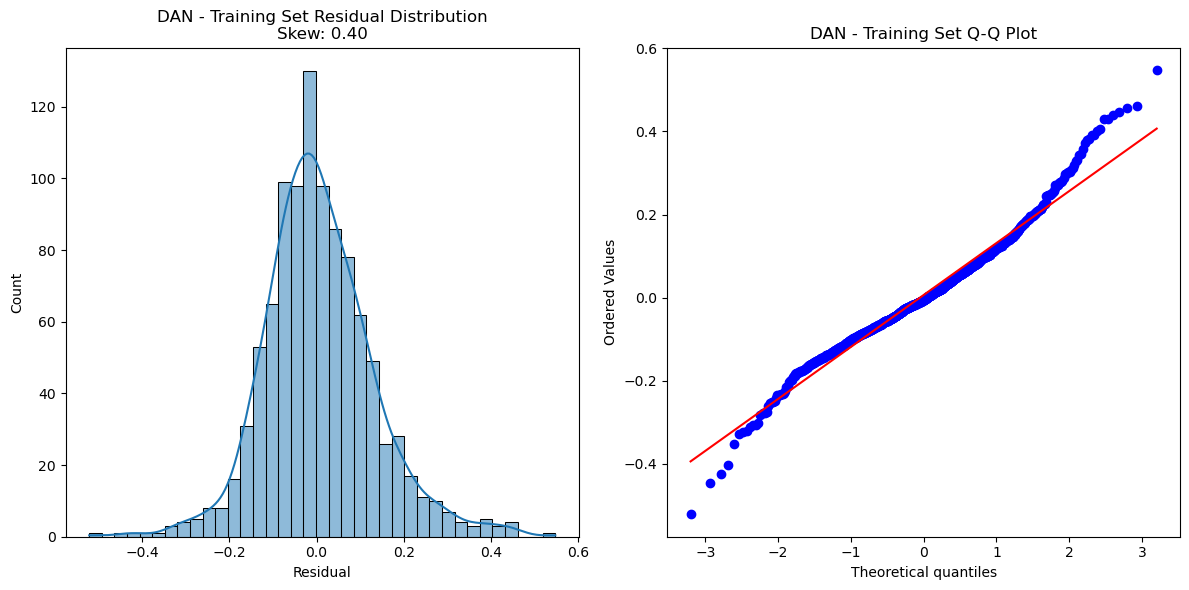

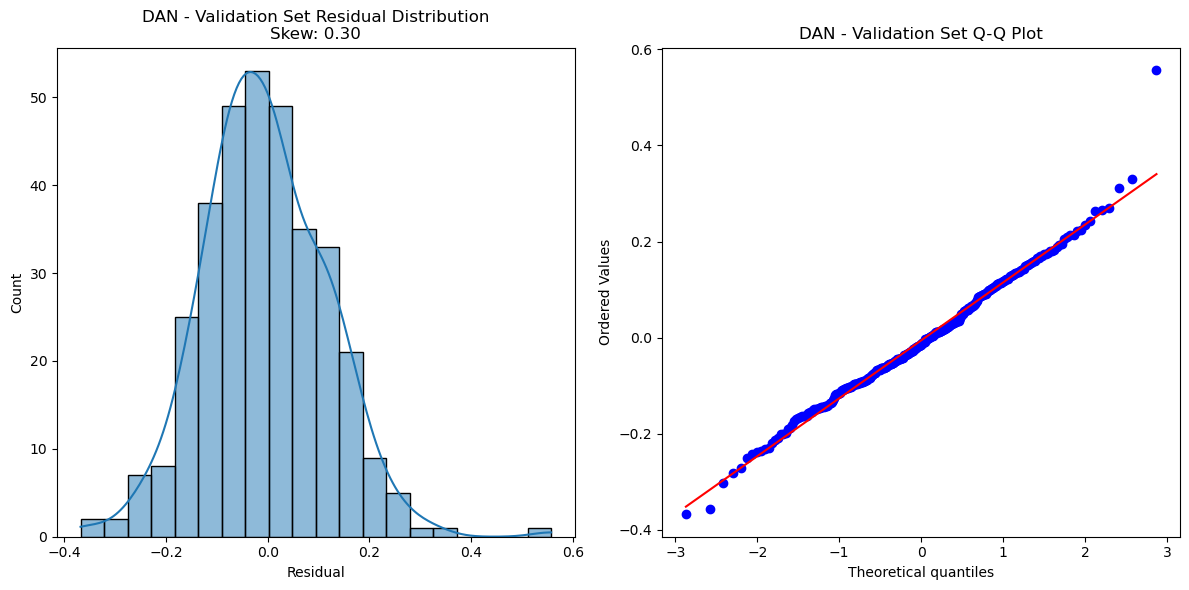

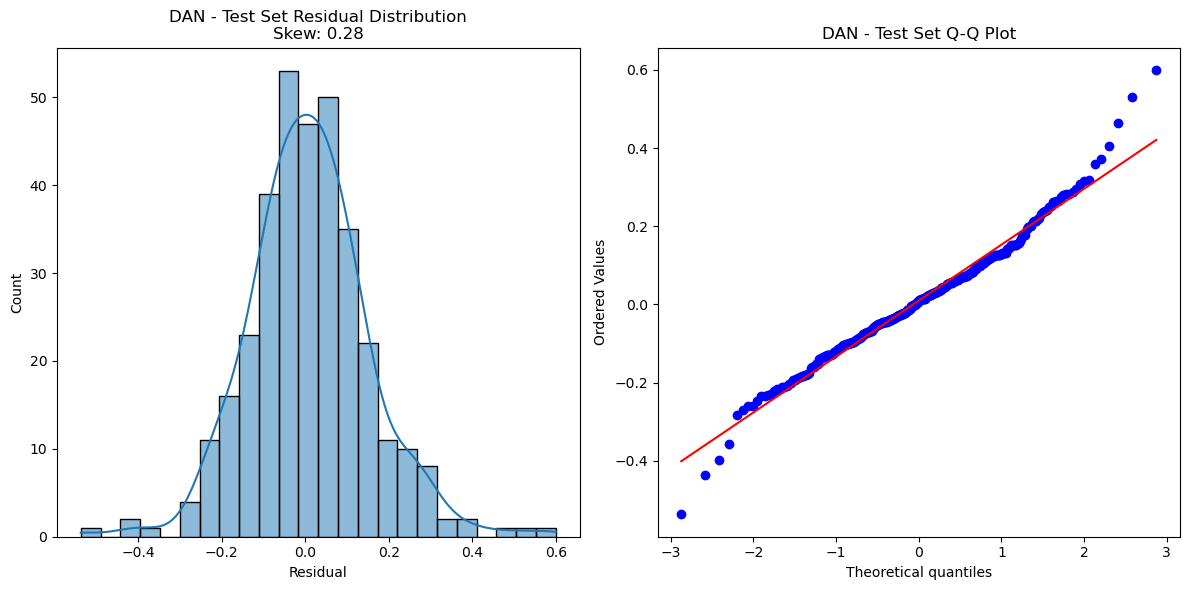

In [88]:

# Generate Predictions for All Datasets

# Train set predictions
yhat_train = final_model.predict(s_train_X)
inv_yhat_train = t_trans.inverse_transform(yhat_train.reshape(-1, 1))
train_y_inv = t_trans.inverse_transform(s_train_y.reshape(-1, 1))

# Validation set predictions
yhat_val = final_model.predict(s_val_X)
inv_yhat_val = t_trans.inverse_transform(yhat_val.reshape(-1, 1))
val_y_inv = t_trans.inverse_transform(s_val_y.reshape(-1, 1))

# Test set predictions 
yhat_test = final_model.predict(s_test_X)
inv_yhat_test = t_trans.inverse_transform(yhat_test.reshape(-1, 1))
test_y_inv = t_trans.inverse_transform(s_test_y.reshape(-1, 1))


# Create Organized DataFrames


def create_results_df(actuals, predictions, dataset_name):
    """Create sorted DataFrame with residuals for a dataset"""
    df = pd.DataFrame({
        'Actual': actuals.flatten(),
        'Predicted': predictions.flatten(),
        'Residual': actuals.flatten() - predictions.flatten()
    }).sort_index()  # Sort by index
    
    df['Dataset'] = dataset_name  # Add dataset identifier
    return df

# Create individual DataFrames
train_results_df = create_results_df(train_y_inv, inv_yhat_train, 'Train')
val_results_df = create_results_df(val_y_inv, inv_yhat_val, 'Validation')
test_results_df = create_results_df(test_y_inv, inv_yhat_test, 'Test')

# Combine all results
combined_results = pd.concat([train_results_df, val_results_df, test_results_df])


# Visualize Residual Distributions


def plot_residual_analysis(df, dataset_name):
    """Plot residual diagnostics for a specific dataset"""
    plt.figure(figsize=(12,6))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df['Residual'], kde=True)
    plt.title(f'DAN - {dataset_name} Residual Distribution\nSkew: {df["Residual"].skew():.2f}')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df['Residual'], dist="norm", plot=plt)
    plt.title(f'DAN - {dataset_name} Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

# Analyze training set
plot_residual_analysis(train_results_df, 'Training Set')

# Analyze validation set
plot_residual_analysis(val_results_df, 'Validation Set')

# Analyze test set
plot_residual_analysis(test_results_df, 'Test Set')

# Save best model

In [89]:
dump(final_model, "/path/to/model.joblib")

['model.joblib']